In [1]:
import pandas as pd
import mplfinance as mpf
from ta.trend import (
    SMAIndicator,
    EMAIndicator,
    MACD,
    PSARIndicator,
    VortexIndicator,
    TRIXIndicator,
    MassIndex,
    DPOIndicator,
    KSTIndicator,
    IchimokuIndicator,
    STCIndicator,
    ADXIndicator,
    CCIIndicator,
    AroonIndicator,
)
from ta.momentum import (
    RSIIndicator,
    StochRSIIndicator,
    TSIIndicator,
    UltimateOscillator,
    StochasticOscillator,
    WilliamsRIndicator,
    AwesomeOscillatorIndicator,
    ROCIndicator,
    PercentagePriceOscillator,
    PercentageVolumeOscillator,
    KAMAIndicator,
)
from ta.volume import (
    AccDistIndexIndicator,
    OnBalanceVolumeIndicator,
    ChaikinMoneyFlowIndicator,
    ForceIndexIndicator,
    EaseOfMovementIndicator,
    VolumePriceTrendIndicator,
    VolumeWeightedAveragePrice,
    MFIIndicator,
    NegativeVolumeIndexIndicator,
)
from ta.volatility import BollingerBands, KeltnerChannel, DonchianChannel, AverageTrueRange, UlcerIndex
from ta.others import DailyReturnIndicator, DailyLogReturnIndicator, CumulativeReturnIndicator

In [2]:
DATA = pd.read_csv("../cache/klines/historical/BTCUSDT-2024-1d.csv", index_col=0, parse_dates=True)

In [3]:
STYLE = mpf.make_mpf_style(base_mpf_style="binancedark", gridstyle="", y_on_right=False)
FIGSIZE = (45, 5)

In [4]:
def _create_histogram(series: pd.Series, panel: int) -> list:
    colors = []
    for i in range(0, len(series)):
        if series.iloc[i] >= 0 and series.iloc[i - 1] < series.iloc[i]:
            colors.append("#3dc985")
        elif series.iloc[i] >= 0 and series.iloc[i - 1] > series.iloc[i]:
            colors.append("#ef4f60")
        elif series.iloc[i] < 0 and series.iloc[i - 1] > series.iloc[i]:
            colors.append("#ef4f60")
        elif series.iloc[i] < 0 and series.iloc[i - 1] < series.iloc[i]:
            colors.append("#3dc985")
        else:
            colors.append("#000000")
    return [
        mpf.make_addplot([0] * len(series), color="w", alpha=0.25, secondary_y=False, panel=panel),
        mpf.make_addplot(series, color="w", alpha=0.25, panel=panel),
        mpf.make_addplot(series, type="bar", width=0.8, color=colors, panel=panel)
    ]

# Overview

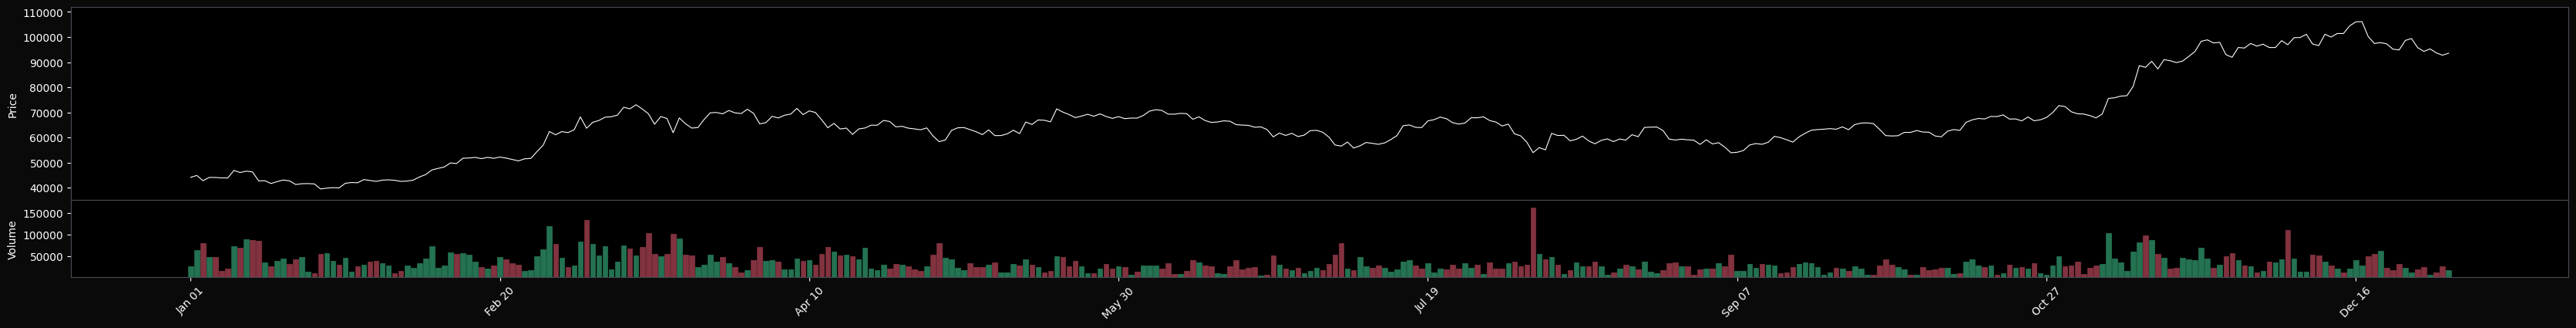

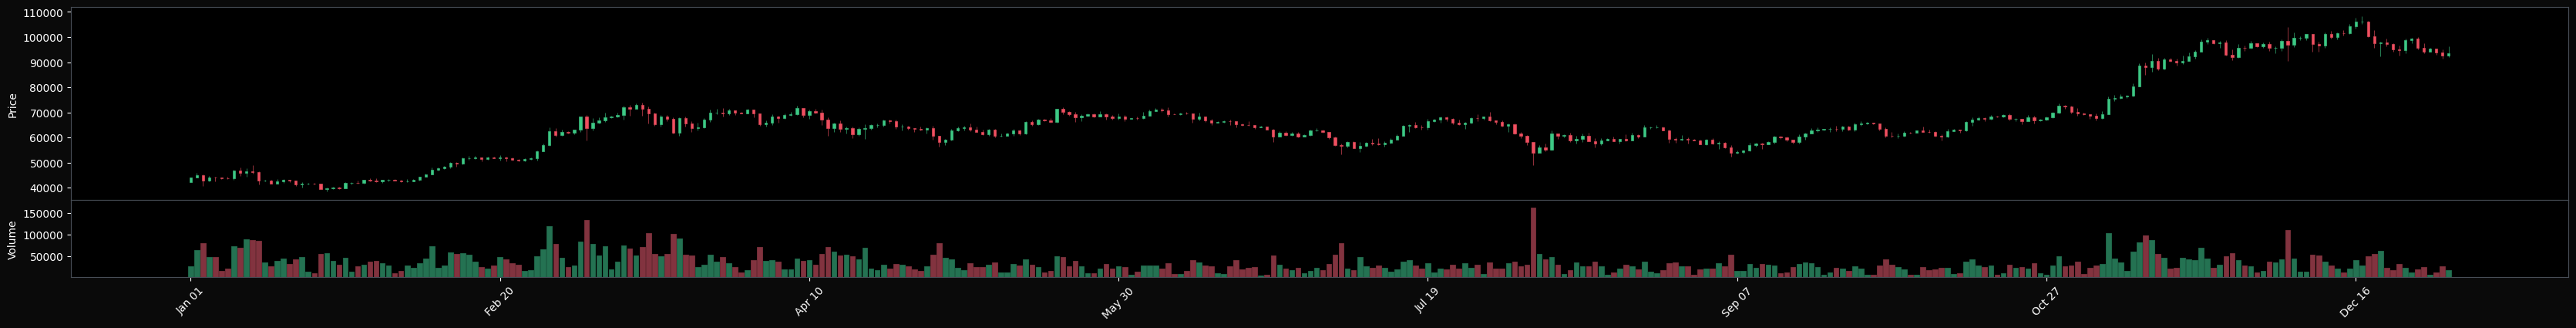

In [5]:
mpf.plot(DATA, type="line", linecolor="white", volume=True, style=STYLE, figsize=FIGSIZE)
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE)

# Indicators

## Trend

### SMA: Simple Moving Average

An arithmetic average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation.

When price is above the SMA, it generally indicates an uptrend, and when below, a downtrend.

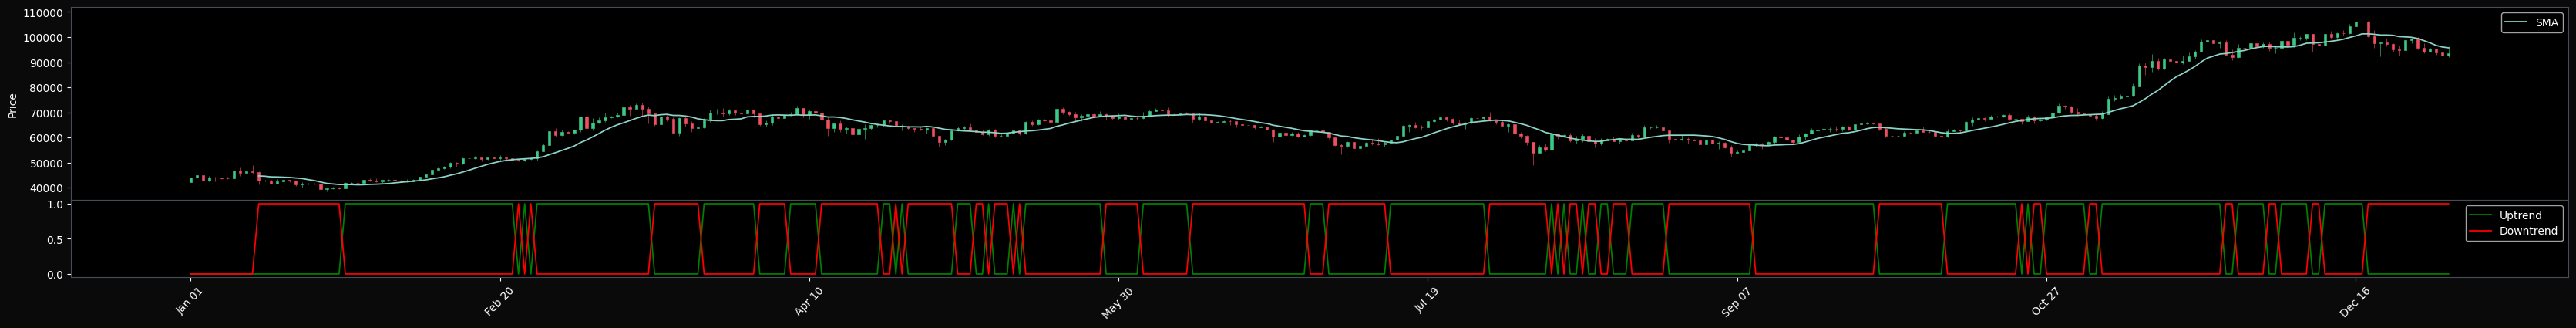

In [6]:
sma = SMAIndicator(DATA["Close"], window=12).sma_indicator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(sma, label="SMA"),
    mpf.make_addplot(DATA["Close"] > sma, color="g", label="Uptrend", panel=1),
    mpf.make_addplot(DATA["Close"] < sma, color="r", label="Downtrend", panel=1)
])

### EMA: Exponential Moving Average

A type of moving average that places a greater weight and significance on the most recent data points.

When price is above the EMA, it generally indicates an uptrend, and when below, a downtrend.

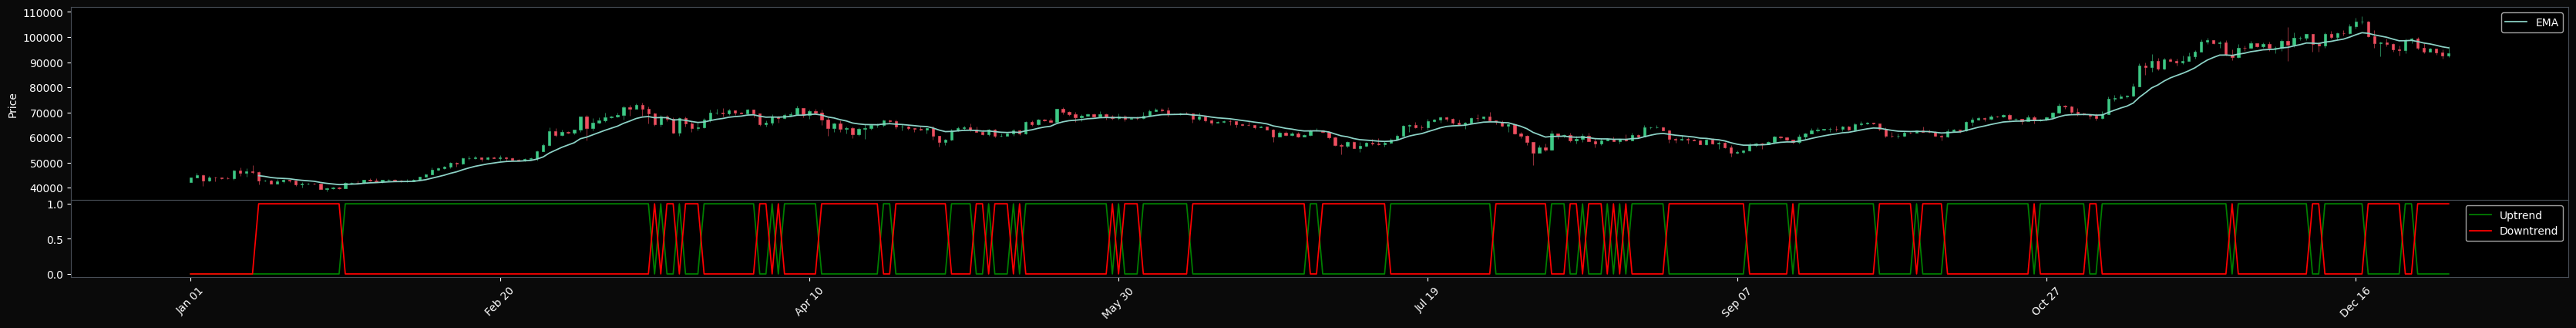

In [7]:
ema = EMAIndicator(DATA["Close"], window=12).ema_indicator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(ema, label="EMA"),
    mpf.make_addplot(DATA["Close"] > ema, color="g", label="Uptrend", panel=1),
    mpf.make_addplot(DATA["Close"] < ema, color="r", label="Downtrend", panel=1)
])

### SMA Crossover: Simple Moving Average Crossover

An **SMA Crossover** occurs when two separate moving average lines intersect on a chart.

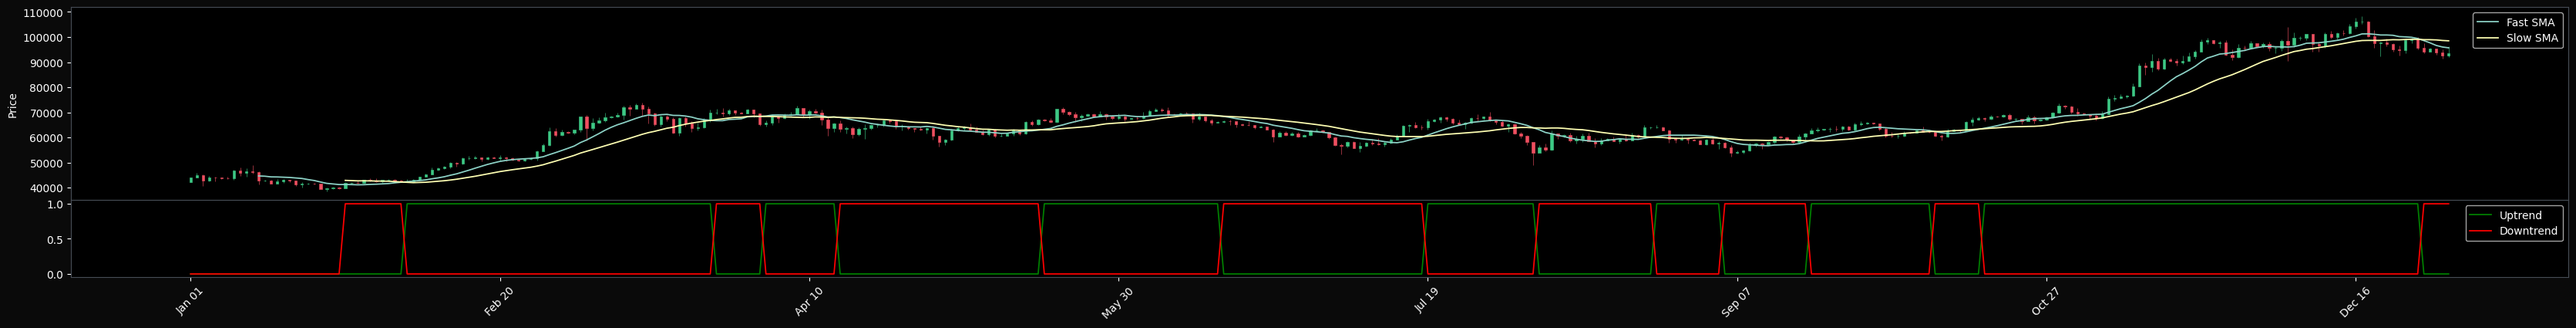

In [8]:
fast_sma = SMAIndicator(DATA["Close"], window=12).sma_indicator()
slow_sma = SMAIndicator(DATA["Close"], window=26).sma_indicator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(fast_sma, label="Fast SMA"),
    mpf.make_addplot(slow_sma, label="Slow SMA"),
    mpf.make_addplot(fast_sma > slow_sma, color="g", label="Uptrend", panel=1),
    mpf.make_addplot(fast_sma < slow_sma, color="r", label="Downtrend", panel=1)
])

### EMA Crossover: Exponential Moving Average Crossover

An **EMA Crossover** occurs when two separate exponential moving average lines intersect on a chart.

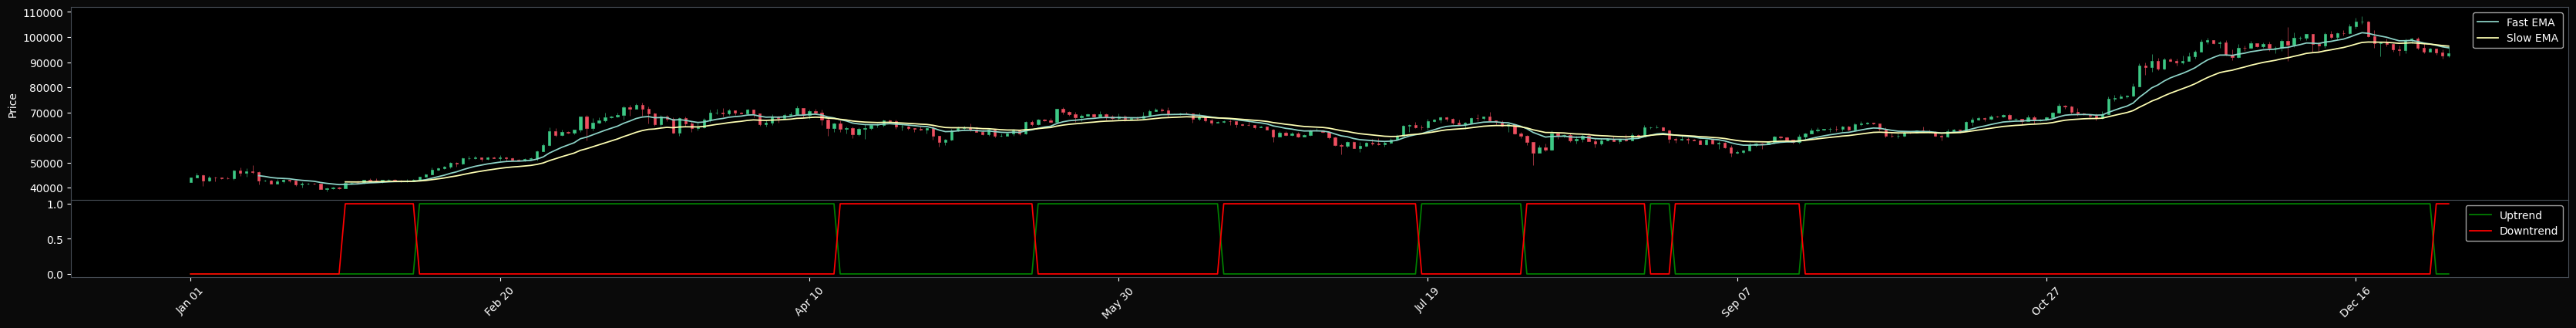

In [9]:
fast_ema = EMAIndicator(DATA["Close"], window=12).ema_indicator()
slow_ema = EMAIndicator(DATA["Close"], window=26).ema_indicator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(fast_ema, label="Fast EMA"),
    mpf.make_addplot(slow_ema, label="Slow EMA"),
    mpf.make_addplot(fast_ema > slow_ema, color="g", label="Uptrend", panel=1),
    mpf.make_addplot(fast_ema < slow_ema, color="r", label="Downtrend", panel=1)
])

### MACD: Moving Average Convergence Divergence

Shows the relationship between two exponential moving averages (EMAs).

1. **MACD Line**: calculated by subtracting the slow EMA from the fast EMA.
2. **MACD Signal Line**: a 'n'-period EMA of the MACD (usually a 9-day EMA).
3. **MACD Diff Line**: shows the difference between the MACD and its 'n'-day EMA.

When the MACD line crosses above the Signal line, it generates a buy signal and when it crosses below, it generates a sell signal.

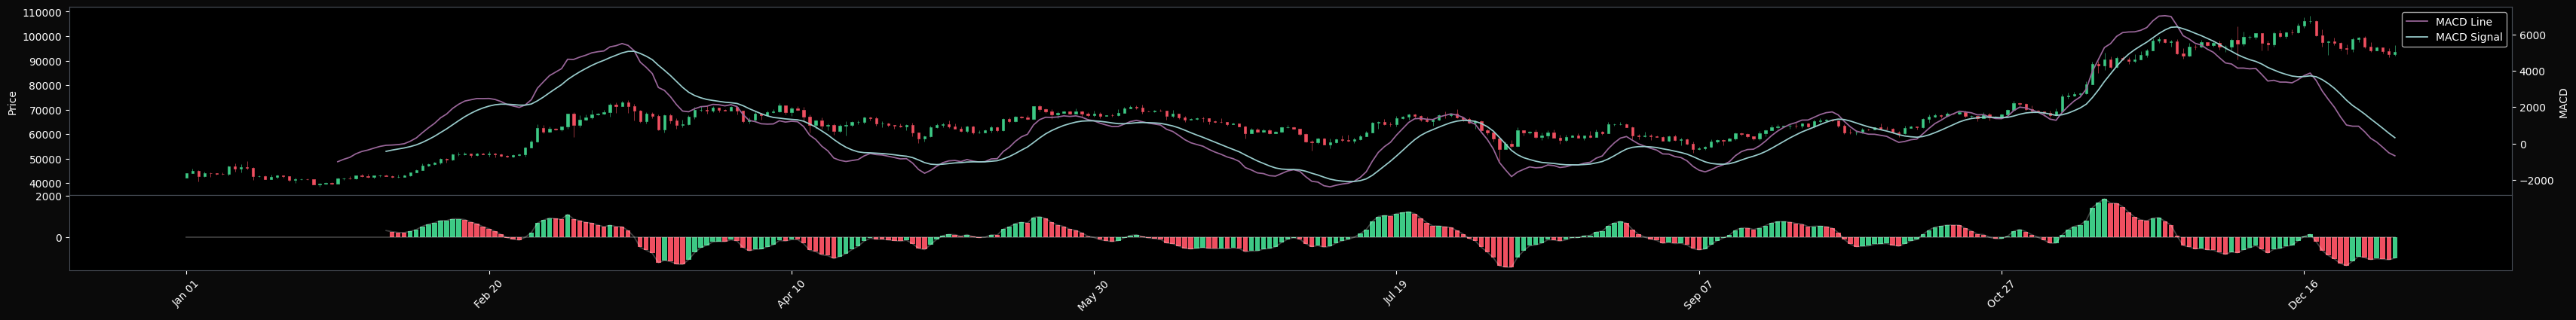

In [10]:
macd = MACD(DATA["Close"], window_slow=26, window_fast=12, window_sign=9)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(macd.macd(), ylabel="MACD", label="MACD Line", color="#996699"),
    mpf.make_addplot(macd.macd_signal(), label="MACD Signal", color="#99cccc"),
    *_create_histogram(macd.macd_diff(), panel=1)
])

### PSAR: Parabolic Stop and Reverse

Displayed as a single parabolic line underneath the price bars in an uptrend, and above the price bars in a downtrend.

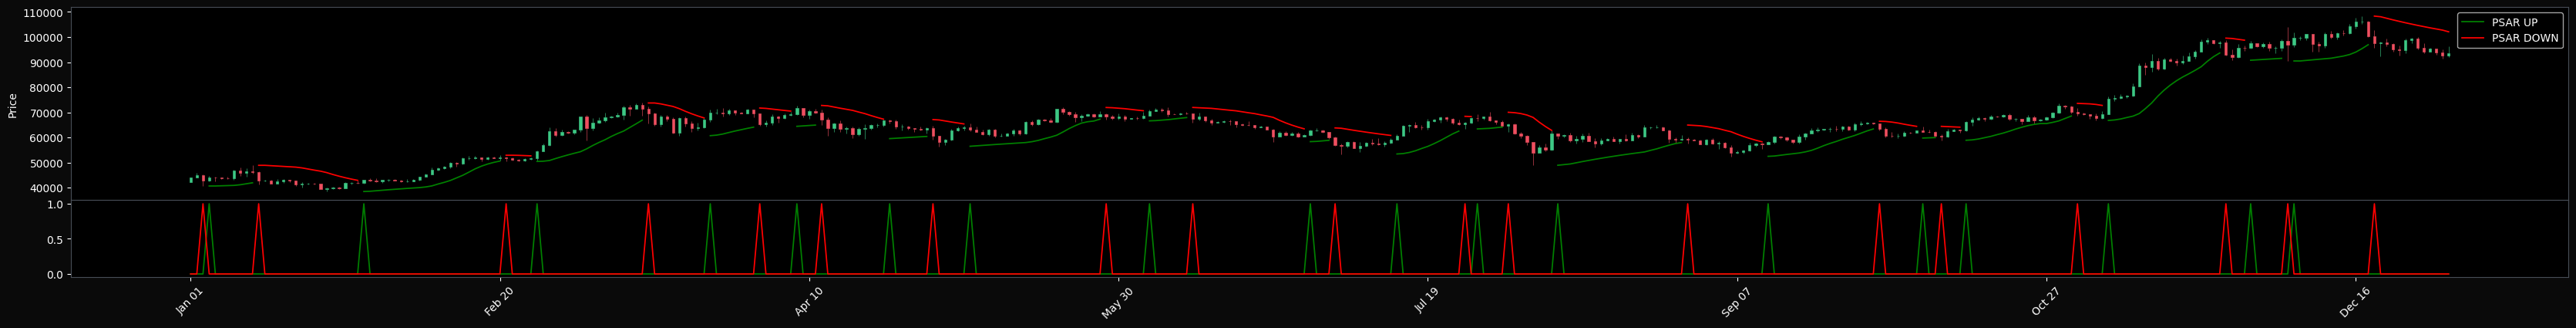

In [11]:
psar = PSARIndicator(DATA["High"], DATA["Low"], DATA["Close"], step=0.02, max_step=0.2)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(psar.psar_up(), color="g", label="PSAR UP"),
    mpf.make_addplot(psar.psar_down(), color="r", label="PSAR DOWN"),
    mpf.make_addplot(psar.psar_up_indicator(), color="g", panel=1),
    mpf.make_addplot(psar.psar_down_indicator(), color="r", panel=1)
])

### Vortex Indicator

It consists of two oscillators that capture positive and negative trend movement.

A bullish signal triggers when the positive trend indicator crosses above the negative trend indicator.

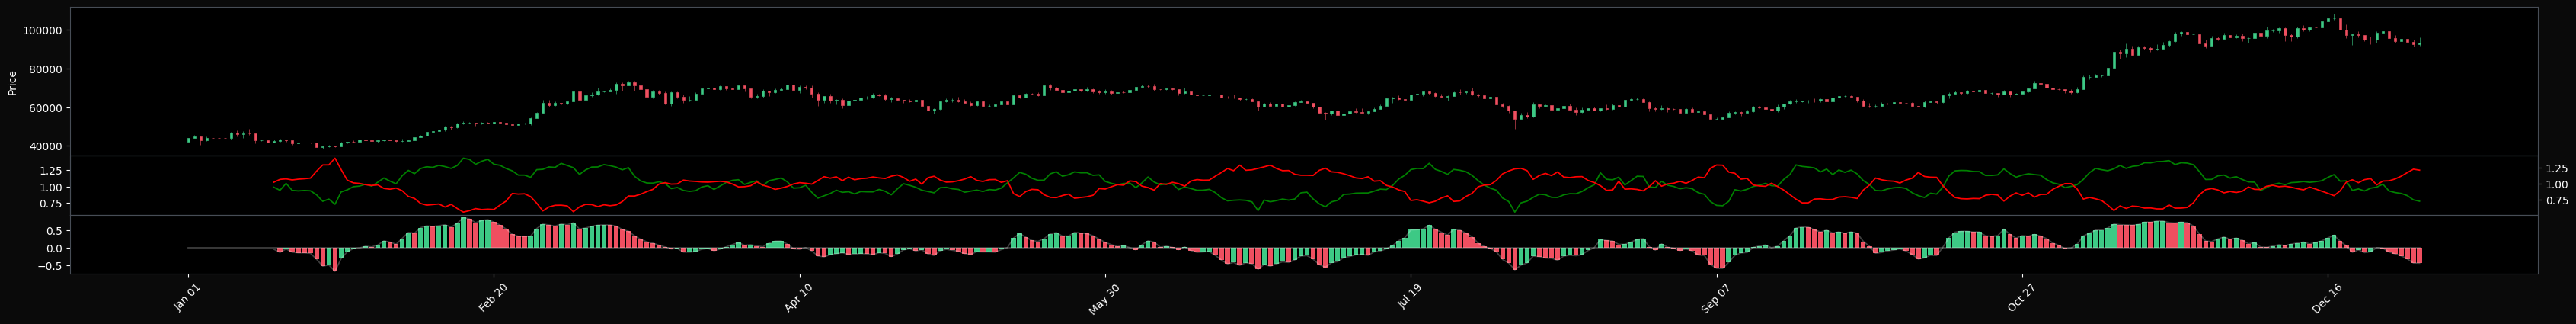

In [12]:
vortex = VortexIndicator(DATA["High"], DATA["Low"], DATA["Close"], window=14)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(vortex.vortex_indicator_pos(), color="g", panel=1),
    mpf.make_addplot(vortex.vortex_indicator_neg(), color="r", panel=1),
    *_create_histogram(vortex.vortex_indicator_diff(), panel=2)
])

### TRIX: Triple Exponential Average 

Shows the percent rate of change of a triple exponentially smoothed moving average.

When the Trix line is positive, it suggests bullish momentum, while a negative Trix line indicates bearish momentum.

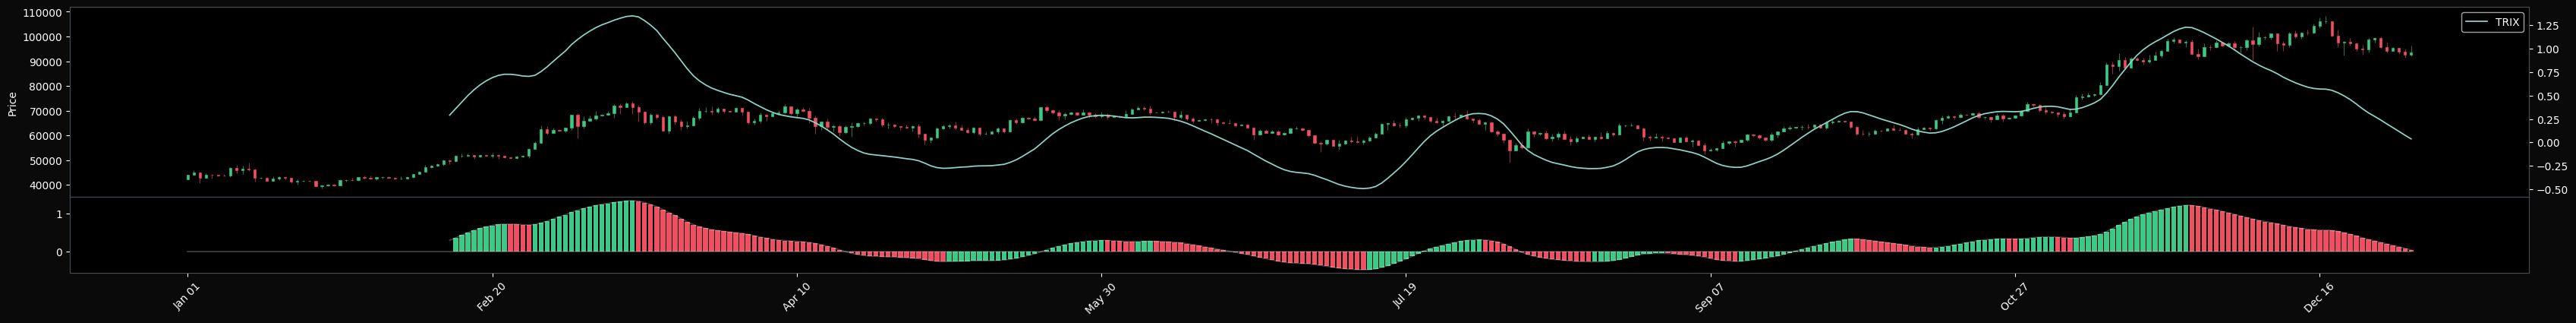

In [13]:
trix = TRIXIndicator(DATA["Close"], window=15)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(trix.trix(), label="TRIX"),
    *_create_histogram(trix.trix(), panel=1)
])

### Mass Index

- It uses the range between high and low to identify trend reversals.
- When the price range between the high and low widens significantly, the Mass Index rises.
- Conversely, when the trading range narrows, the Mass Index falls.
- The Mass Index typically fluctuates in the mid-20s.

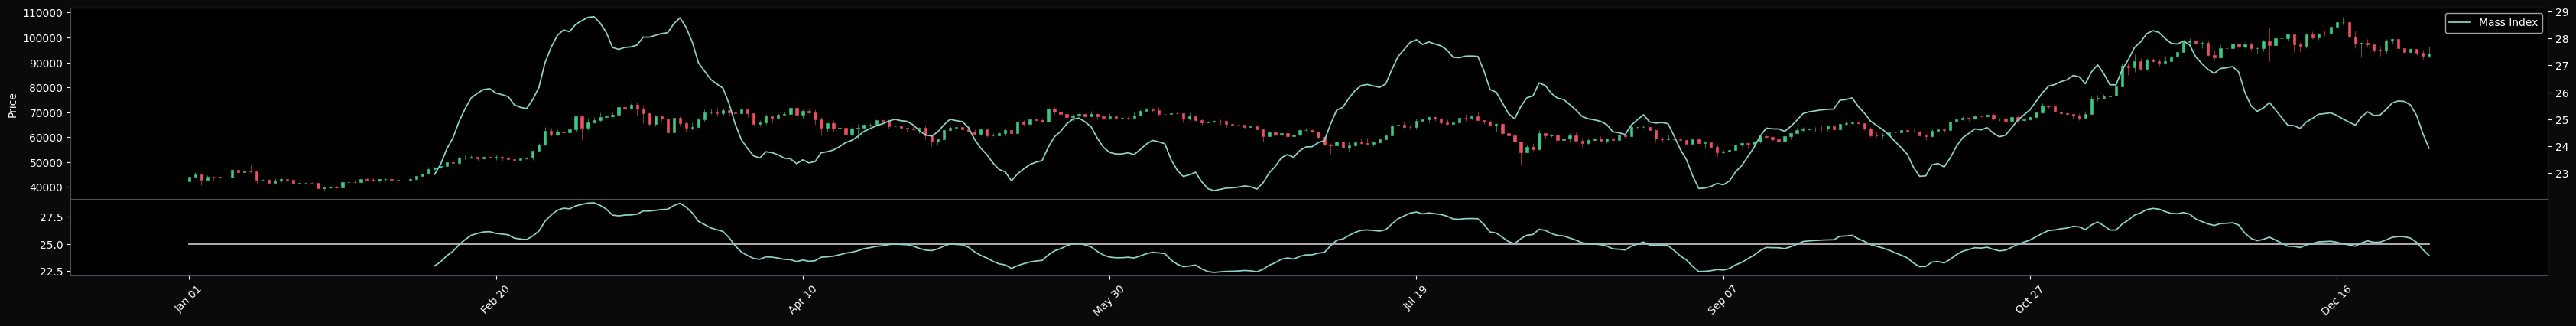

In [14]:
mi = MassIndex(DATA["Close"], DATA["Low"], window_fast=9, window_slow=25).mass_index()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(mi, label="Mass Index"),
    mpf.make_addplot([25] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot(mi, panel=1)
])

### DPO: Detrended Price Oscillator 

An indicator designed to remove trend from price and make it easier to identify price cycles and highlight historical peaks and troughs.

By comparing the SMA to a historical price near the middle of the look-back period, traders can:
- Draw vertical lines at historical peaks and troughs on the indicator.
- Count the time elapsed between these peaks and troughs.

For example:
- If bottoms (troughs) are historically about two months apart, traders can project the next buying opportunity.
- If peaks are generally 1.5 months apart, projecting the next peak can be used as a selling opportunity before the price retreats.

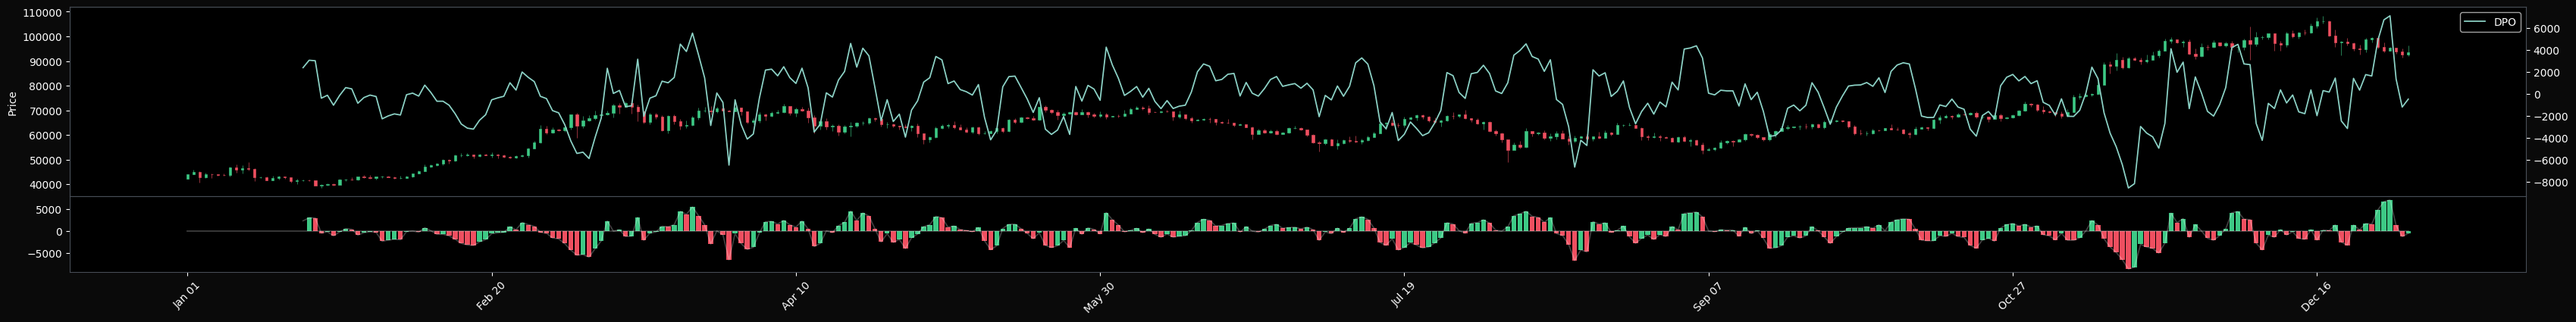

In [15]:
dpo = DPOIndicator(DATA["Close"], window=20).dpo()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(dpo, label="DPO"), *_create_histogram(dpo, panel=1)])

### KST: Know Sure Thing 

Useful to identify major stock market cycle junctures because its formula is weighed to be more greatly influenced by the longer and more dominant time spans, in order to better reflect the primary swings of stock market cycle.

When the KST crosses over the signal line, it generates trading signals.

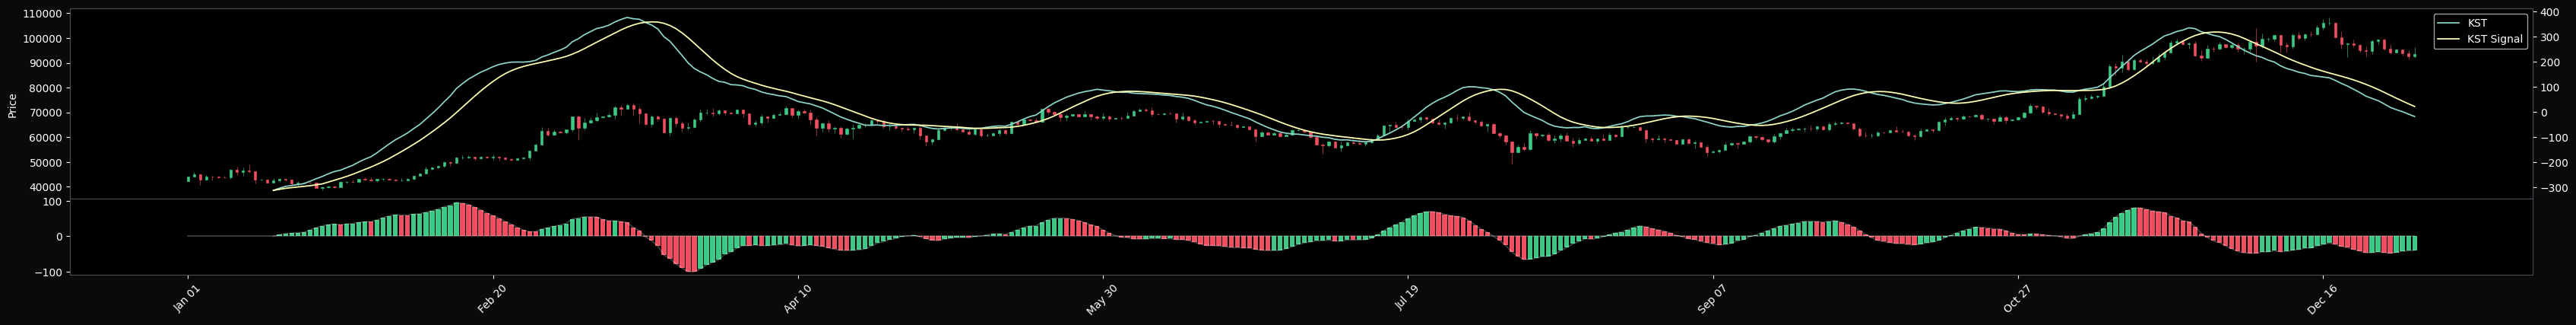

In [16]:
kst = KSTIndicator(DATA["Close"], roc1=10, roc2=15, roc3=20, roc4=30, window1=10, window2=10, window3=10, window4=15, nsig=9)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(kst.kst(), label="KST"),
    mpf.make_addplot(kst.kst_sig(), label="KST Signal"),
    *_create_histogram(kst.kst_diff(), panel=1),
])

### Ichimoku Cloud

A comprehensive technical indicator that combines several elements to assess support, resistance, momentum, and trend direction.

It uses multiple moving averages plotted on a chart and computes a "cloud" to predict future support or resistance levels.

The cloud's position relative to price indicates the trend: below the cloud suggests a downtrend, while above it signals an uptrend.

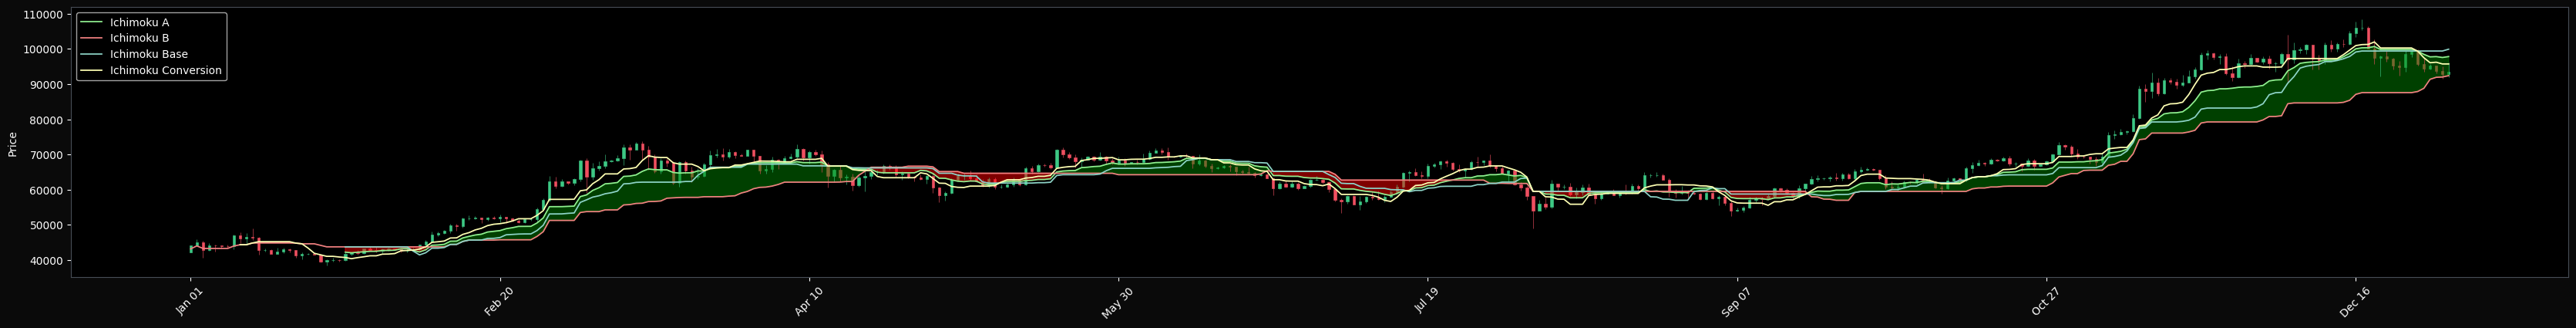

In [17]:
ichimoku = IchimokuIndicator(DATA["High"], DATA["Low"], window1=9, window2=26, window3=52)
addplot = [
    mpf.make_addplot(ichimoku.ichimoku_a(), color="lightgreen", label="Ichimoku A"),
    mpf.make_addplot(ichimoku.ichimoku_b(), color="lightcoral", label="Ichimoku B"),
    mpf.make_addplot(ichimoku.ichimoku_base_line(), label="Ichimoku Base"),
    mpf.make_addplot(ichimoku.ichimoku_conversion_line(), label="Ichimoku Conversion")
]
fill_up = dict(
    y1=ichimoku.ichimoku_a().values,
    y2=ichimoku.ichimoku_b().values,
    where=ichimoku.ichimoku_a() >= ichimoku.ichimoku_b(),
    alpha=0.5,
    color="green"
)
fill_down = dict(
    y1=ichimoku.ichimoku_a().values,
    y2=ichimoku.ichimoku_b().values,
    where=ichimoku.ichimoku_a() < ichimoku.ichimoku_b(),
    alpha=0.5,
    color="red"
)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=addplot, fill_between=[fill_up, fill_down])

### STC: Schaff Trend Cycle 

A type of oscillator and is based on the assumption that, regardless of time frame, currency trends accelerate and decelerate in cyclical patterns.

It oscillates between 0 and 100, with values above 50 indicating a bullish trend and values below 50 indicating a bearish trend.

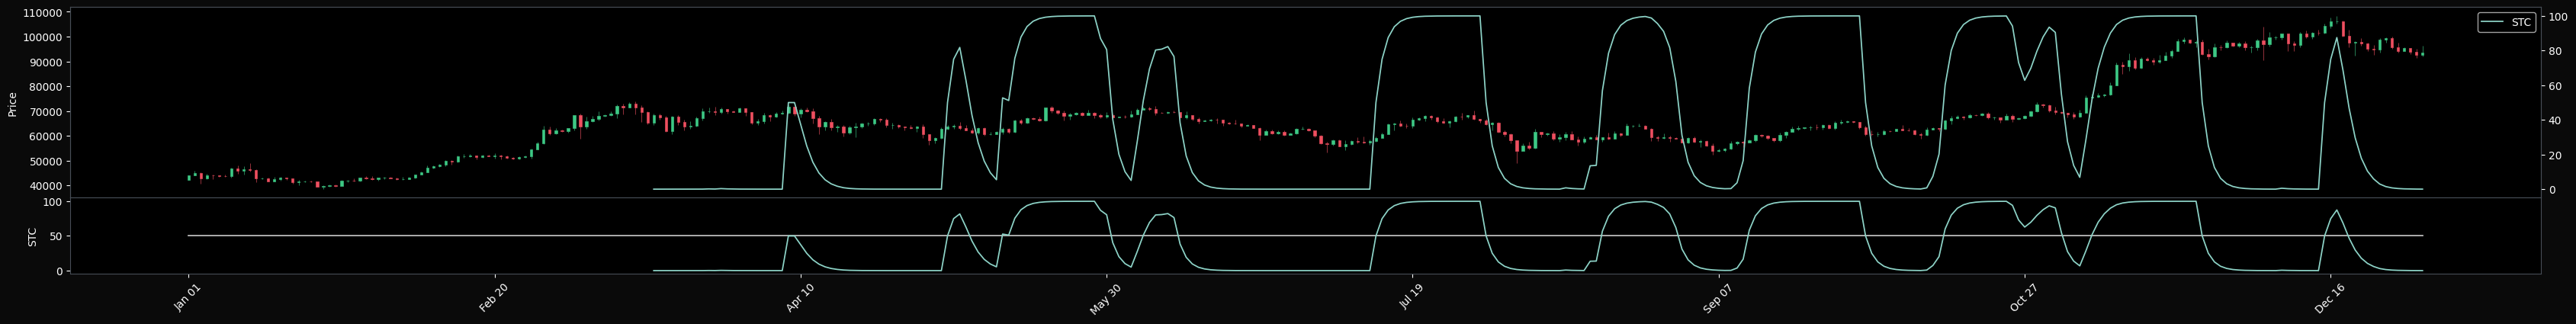

In [18]:
stc = STCIndicator(DATA["Close"], window_slow=50, window_fast=23, cycle=10, smooth1=3, smooth2=3).stc()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(stc, label="STC"),
    mpf.make_addplot([50] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot(stc, ylabel="STC", panel=1)
])

### ADX: Average Directional Index 

The Average Directional Index (ADX) is a technical analysis indicator used to measure the strength and momentum of trends.

The ADX combines three lines:
- Positive Directional Indicator (+DI): Measures upward price movement.
- Negative Directional Indicator (-DI): Measures downward price movement.
- ADX Line: Represents the overall strength of the trend.

Interpretation:
- When the ADX is above 25, the trend is considered strong.
- When the ADX is below 20, the trend is weak or the price is trendless.
    - Note that “non-trending” doesn’t mean the price isn’t moving; it could be making a trend change or be too volatile for a clear direction.

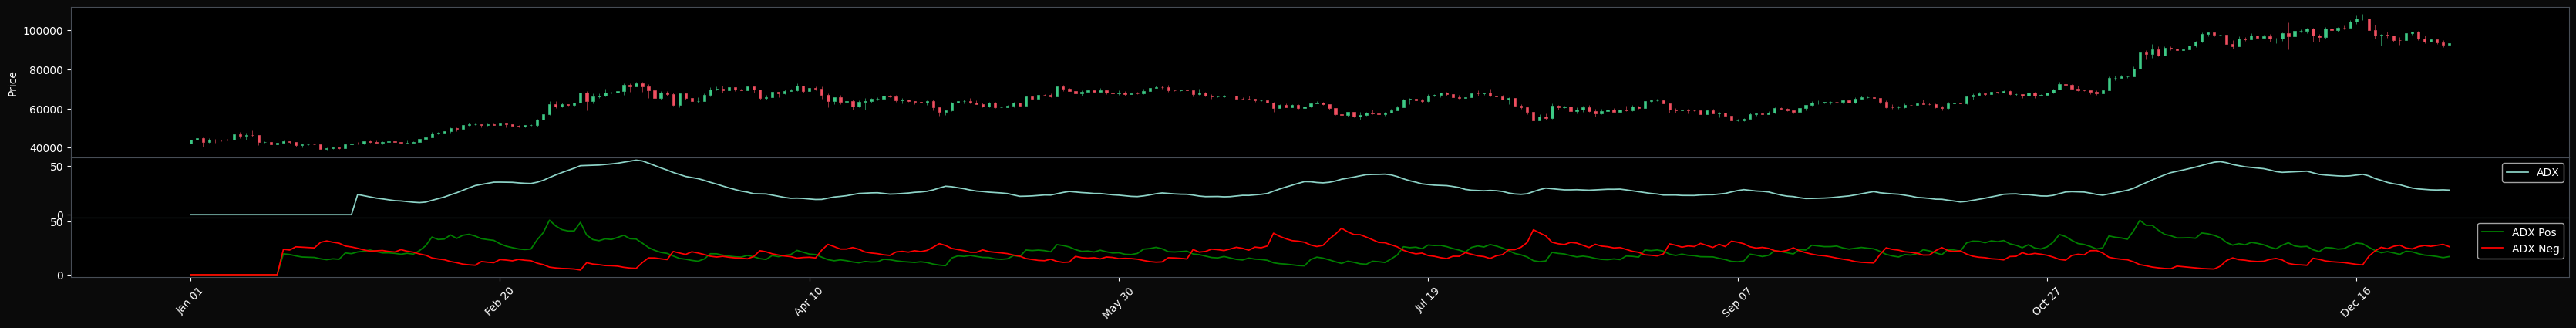

In [19]:
adx = ADXIndicator(DATA["High"], DATA["Low"], DATA["Close"], window=14)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(adx.adx(), label="ADX", panel=1),
    mpf.make_addplot(adx.adx_pos(), label="ADX Pos", color="g", panel=2),
    mpf.make_addplot(adx.adx_neg(), label="ADX Neg", color="r", panel=2)
])

### CCI: Commodity Channel Index 

Explanation:
- The Commodity Channel Index (CCI) is a momentum-based oscillator used to determine if an investment vehicle is overbought or oversold.
- Measures the difference between a security's price change and its average price change.

Interpretation:
- When the CCI is above zero, it indicates the price is above the historical average, and below zero suggests the price is below the average.
- High positive readings indicate that prices are well above their average, which is a show of strength.
- Low negative readings indicate that prices are well below their average, which is a show of weakness.

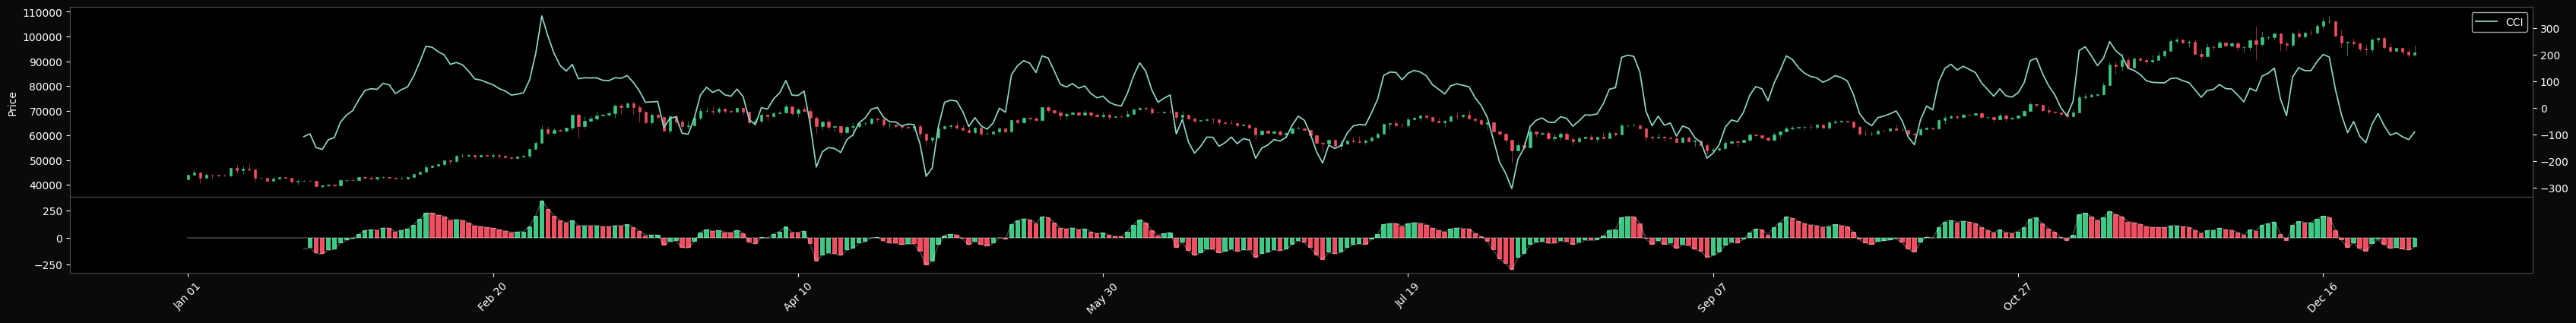

In [20]:
cci = CCIIndicator(DATA["High"], DATA["Low"], DATA["Close"], window=20, constant=0.015).cci()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(cci, label="CCI"), *_create_histogram(cci, panel=1)])

### Aroon

The Aroon indicator is used to identify trend changes in asset prices and assess the strength of those trends.

The Aroon indicator is scaled between **0** and **100**.

- **Aroon Up**: Measures the strength of the uptrend.
- **Aroon Down**: Measures the strength of the downtrend.

Interpretation
- When **Aroon Up** is above **50**, it indicates bullish price behavior (new highs within the last 12.5 periods).
- When **Aroon Down** is above **50**, it signals bearish price behavior (new lows within the last 12.5 periods).
- Values close to **100** indicate a strong trend, while values near **0** suggest a weak trend.
- The area around **50** is a middle ground where the trend could go either way.

Crossovers
- When **Aroon Up** crosses above **Aroon Down** it may indicate a new uptrend starting.
- When **Aroon Down** crosses above **Aroon Up** it may indicate a new downtrend starting.

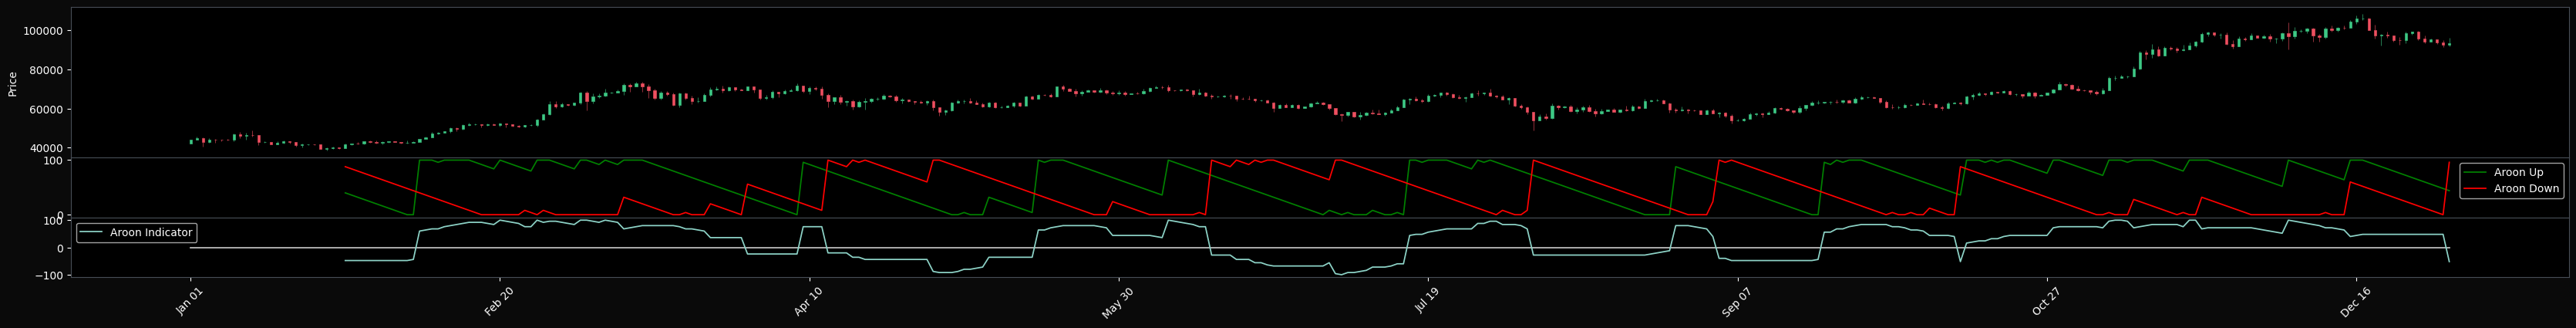

In [21]:
aroon = AroonIndicator(DATA["High"], DATA["Low"], window=25)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(aroon.aroon_up(), label="Aroon Up", color="g", panel=1),
    mpf.make_addplot(aroon.aroon_down(), label="Aroon Down", color="r", panel=1),
    mpf.make_addplot([0] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot(aroon.aroon_indicator(), label="Aroon Indicator", panel=2)
])

## Momentum

### RSI: Relative Strength Index 

Explanation
- It compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security.
- It is primarily used to attempt to identify overbought or oversold conditions.

Interpretation
- The **RSI** is displayed as an oscillator on a scale of **0** to **100**.
- A reading above **70** indicates an overbought situation, while a reading below **30** indicates an oversold condition.

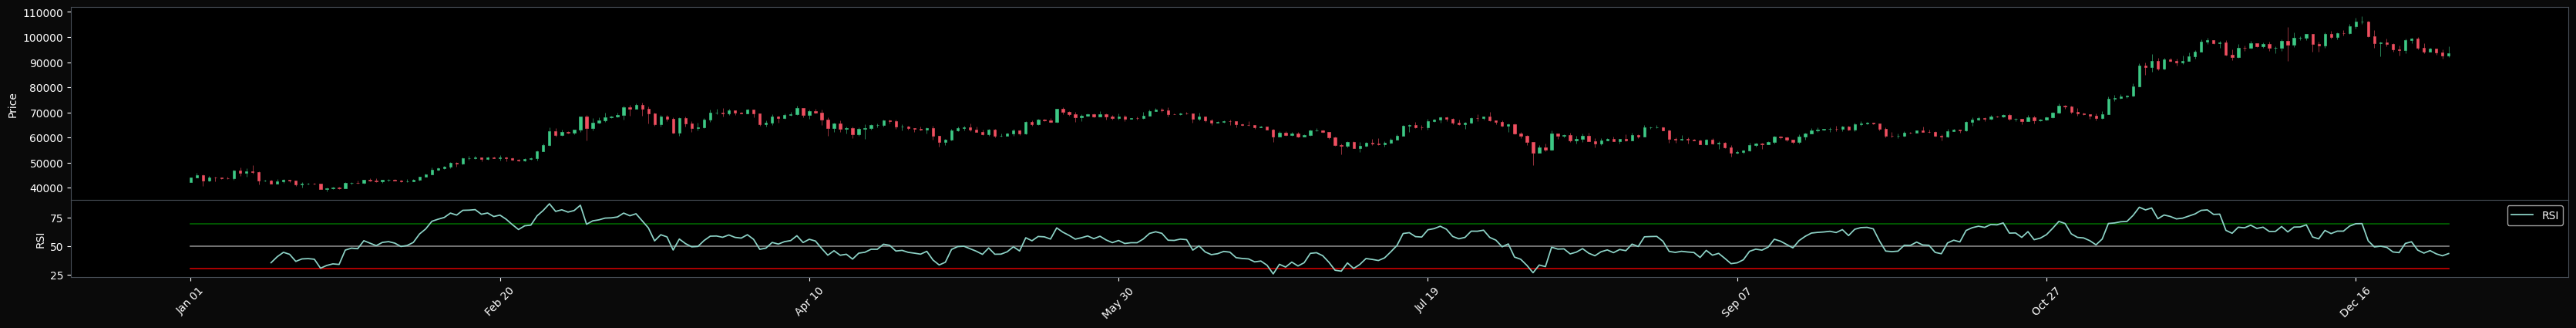

In [22]:
rsi = RSIIndicator(DATA["Close"], window=14).rsi()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot([70] * len(DATA), color="g", alpha=0.75, secondary_y=False, ylabel="RSI", panel=1),
    mpf.make_addplot([50] * len(DATA), color="w", alpha=0.50, secondary_y=False, ylabel="RSI", panel=1),
    mpf.make_addplot([30] * len(DATA), color="r", alpha=0.75, secondary_y=False, ylabel="RSI", panel=1),
    mpf.make_addplot(rsi, label="RSI", panel=1)
])

### SRSI: Stochastic Relative Strength Index 

An indicator attuned to a specific security's historical performance rather than a generalized analysis of price change.
1. **K Line** (Fast Stochastic): Represents the number of RSI periods used in the stochastic calculation. It reacts more quickly to price changes.
2. **D Line** (Slow Stochastic or Signal Line): A moving average of K. It helps reduce false signals and provides a smoother view of trend changes.

Interpretation:
- StochRSI ranges between zero and one.
- A StochRSI reading above 0.8 is considered overbought, while a reading below 0.2 is considered oversold.

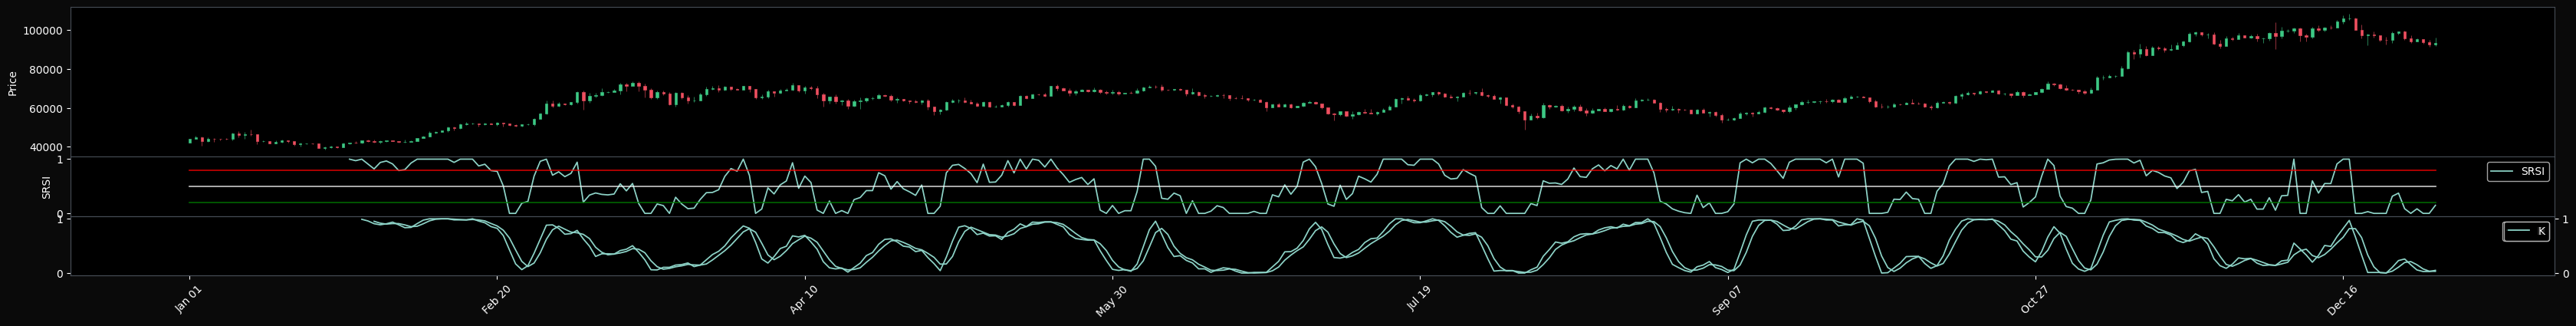

In [23]:
srsi = StochRSIIndicator(DATA["Close"], window=14, smooth1=3, smooth2=3)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
        mpf.make_addplot(srsi.stochrsi(), label="SRSI", panel=1),
        mpf.make_addplot([0.8] * len(DATA), color="r", alpha=0.75, secondary_y=False, ylabel="SRSI", panel=1),
        mpf.make_addplot([0.5] * len(DATA), color="w", alpha=0.75, secondary_y=False, ylabel="SRSI", panel=1),
        mpf.make_addplot([0.2] * len(DATA), color="g", alpha=0.75, secondary_y=False, ylabel="SRSI", panel=1),
        mpf.make_addplot(srsi.stochrsi_d(), label="D", panel=2),
        mpf.make_addplot(srsi.stochrsi_k(), label="K", panel=2)
    ])

### TSI: True Strength Index 

Shows both trend direction and overbought/oversold conditions.

When the TSI crosses above the zero line, it can serve as a buy signal.

Conversely, when it crosses below the zero line, it can be a sell signal.

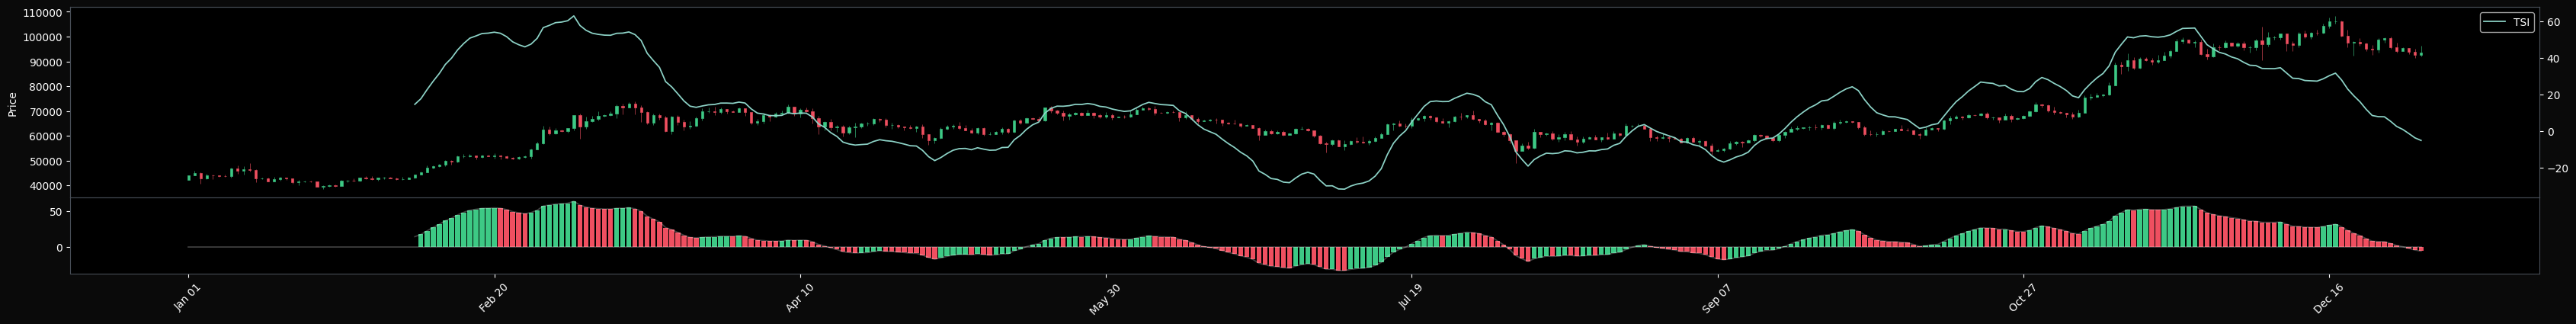

In [24]:
tsi = TSIIndicator(DATA["Close"], window_slow=25, window_fast=13).tsi()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(tsi, label="TSI"), *_create_histogram(tsi, panel=1)])

### Ultimate Oscillator

A momentum oscillator designed to capture momentum across three different time frames.

Overbought and Oversold Levels
- The oscillator ranges from 0 to 100.
- Overbought conditions typically occur when the oscillator is above 70.
- Oversold conditions occur when the oscillator is below 30.

Divergence Signals
- Buy signals
    - Bullish divergence: When price and the oscillator diverge, and the oscillator’s low is below 30.
    - The oscillator then rises above the divergence high.
- Sell signals
    - Bearish divergence: When price and the oscillator diverge, and the oscillator’s high is above 70.
    - The oscillator then falls below the divergence low.

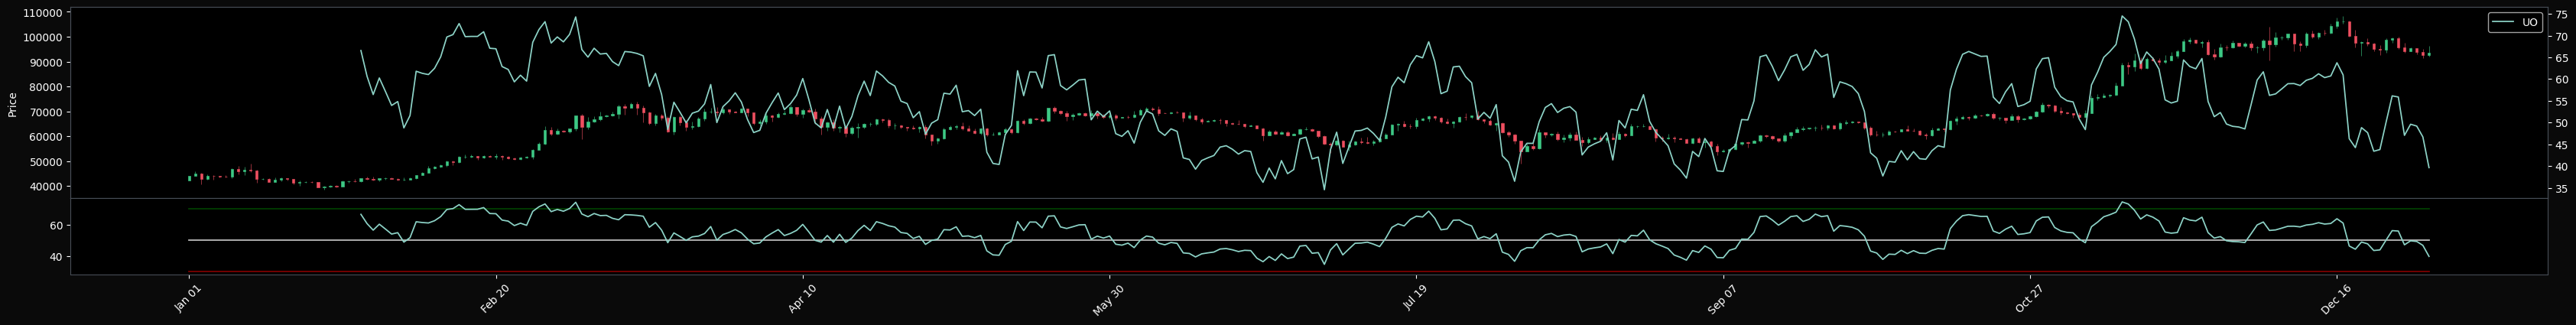

In [25]:
uo = UltimateOscillator(DATA["High"], DATA["Low"], DATA["Close"], window1=7, window2=14, window3=28, weight1=4, weight2=2, weight3=1).ultimate_oscillator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(uo, label="UO"),
    mpf.make_addplot([70] * len(DATA), color="g", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot([50] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot([30] * len(DATA), color="r", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot(uo, panel=1)
])

### Stochastic Oscillator

Overbought and Oversold Levels
- The oscillator ranges from 0 to 100.
- Overbought conditions typically occur when the oscillator is above 80.
- Oversold conditions occur when the oscillator is below 20.

The chart typically shows two lines:
- The actual oscillator value for each session.
- Its three-day simple moving average.

When these lines intersect, it signals a potential reversal due to a shift in momentum.

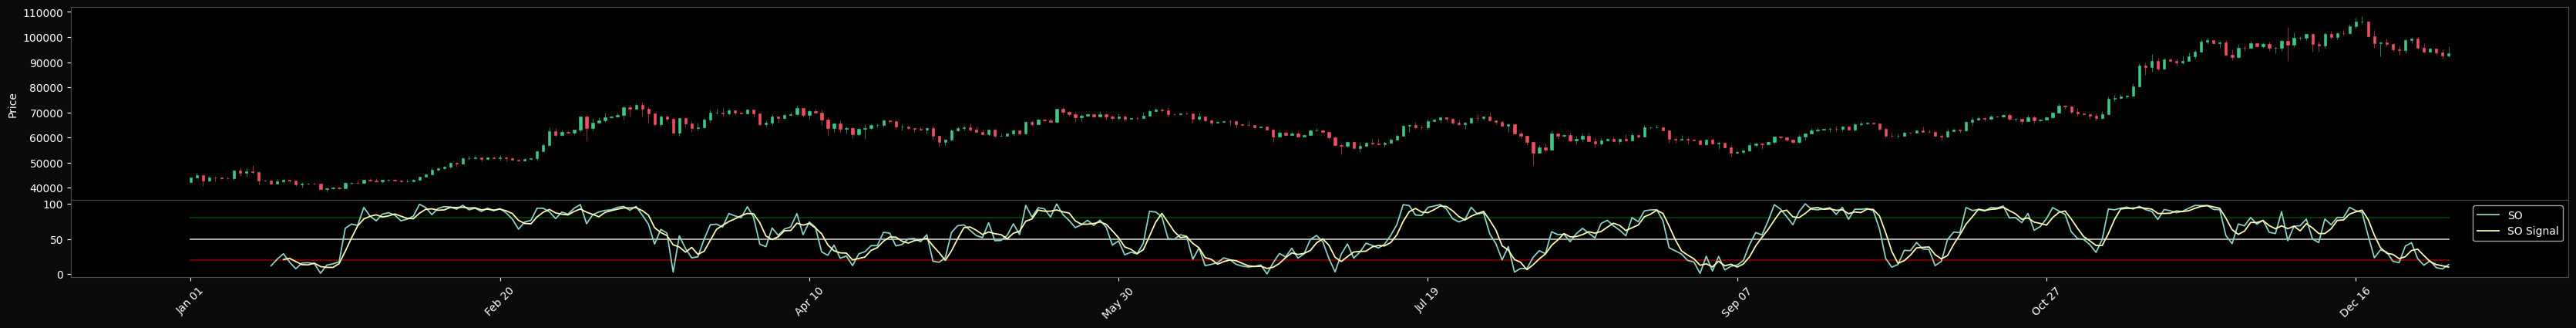

In [26]:
so = StochasticOscillator(DATA["High"], DATA["Low"], DATA["Close"], window=14, smooth_window=3)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot([80] * len(DATA), color="g", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot([50] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot([20] * len(DATA), color="r", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot(so.stoch(), label="SO", panel=1),
    mpf.make_addplot(so.stoch_signal(), label="SO Signal", panel=1)
])

### Williams %R

A momentum indicator that is the inverse of the Fast Stochastic Oscillator.

Also referred to as %R, Williams %R reflects the level of the close relative to the highest high for the look-back period.

Unsurprisingly, signals derived from the Stochastic Oscillator are also applicable to Williams %R.

Overbought and Oversold Levels
- The oscillator ranges from 0 to -100.
- Readings from 0 to -20 are considered overbought.
- Readings from -80 to -100 are considered oversold.

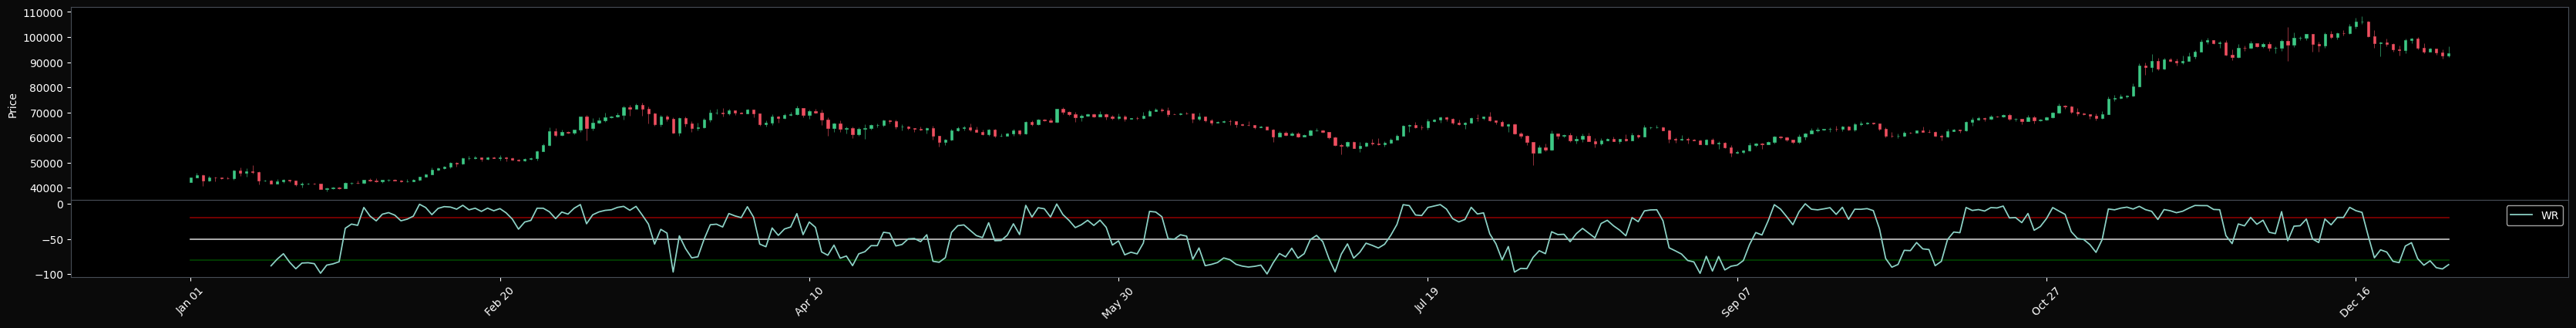

In [27]:
wr = WilliamsRIndicator(DATA["High"], DATA["Low"], DATA["Close"], lbp=14).williams_r()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot([-80] * len(DATA), color="g", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot([-50] * len(DATA), color="w", alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot([-20] * len(DATA), color="r", alpha=0.5, secondary_y=False, panel=1),
    mpf.make_addplot(wr, label="WR", panel=1)
])

### Awesome Oscillator

**AO** is generally used to affirm trends or to anticipate possible reversals.

Histogram Representation
- The AO is presented as a histogram that oscillates around a zero line.
- When bars are above the zero line and green, it indicates strong bullish momentum.
- Conversely, red bars above the zero line suggest diminishing bullish momentum.
- Below the zero line, green bars hint at a potential bullish turnaround despite the prevailing bearish trend, while red bars emphasize continuing bearish momentum.

Interpretation
- Bullish Signal: Positive AO values (above zero) indicate bullish momentum.
- Bearish Signal: Negative AO values (below zero) indicate bearish momentum.
- Zero Line Cross: Crossovers of the AO above or below the zero line signal potential trend changes.
- Divergence: Compare AO peaks/troughs with price peaks/troughs for divergence signals.

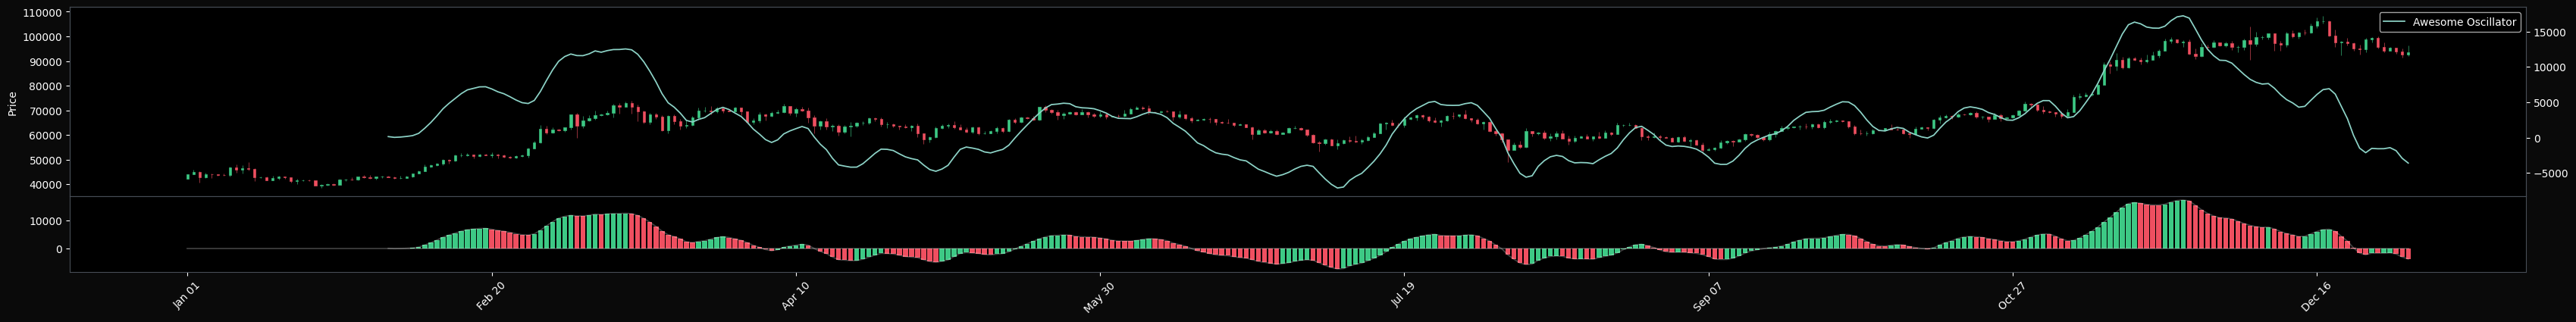

In [28]:
ao = AwesomeOscillatorIndicator(DATA["High"], DATA["Low"], window1=5, window2=34).awesome_oscillator()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(ao, label="Awesome Oscillator"),
    *_create_histogram(ao, panel=1)
])

### ROC: Rate of Change 

The Rate-of-Change (ROC) indicator, is a momentum oscillator that compares the percent change in price between the current price and the price 'n' number of periods ago.

The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from positive to negative.

As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings.

ROC helps spot divergences, overbought/oversold conditions, and centerline crossovers.

Short-term traders choose smaller 'n' values for quicker reactions, while longer-term investors opt for larger 'n' values for more meaningful signals.

Interpretation
- When the ROC is above zero, it typically confirms an uptrend.
- When the ROC is below zero, it indicates a downtrend.
- Near-zero values suggest a consolidating market (where prices are neither strongly rising nor falling).

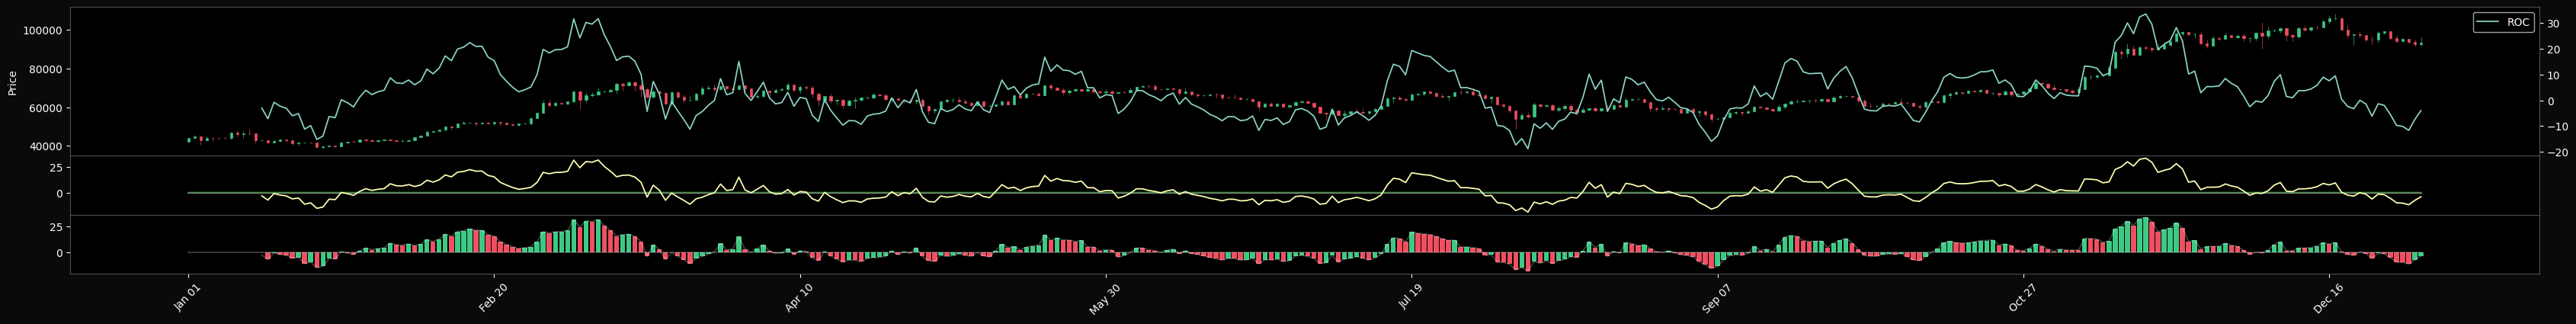

In [29]:
roc = ROCIndicator(DATA["Close"], window=12).roc()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(roc, label="ROC"),
    mpf.make_addplot([-0.5] * len(DATA), alpha=0.5, color="r", secondary_y=False, panel=1),
    mpf.make_addplot([0] * len(DATA), alpha=0.75, secondary_y=False, panel=1),
    mpf.make_addplot([0.5] * len(DATA), alpha=0.5, color="g", secondary_y=False, panel=1),
    mpf.make_addplot(roc, panel=1),
    *_create_histogram(roc, panel=2)
])

### PPO: Percentage Price Oscillator 

A momentum oscillator that measures the difference between two moving averages as a percentage of the larger moving average.

- PPO Line: This represents the percentage difference between a 26-period EMA and a 12-period EMA. It measures the short-term trend.
- Signal Line: The signal line is an EMA of the PPO itself. It moves more slowly than the PPO line and helps generate trade signals.

Crossing Signals
- When the PPO crosses above the signal line from below, it’s considered a buy signal.
- Conversely, when the PPO crosses below the signal line from above, it’s a sell signal.

Zero Line
- If the PPO is above zero, it indicates an uptrend (short-term EMA above long-term EMA).
- If the PPO is below zero, it suggests a downtrend (short-term EMA below long-term EMA).

Comparison with MACD
- The PPO is similar to the Moving Average Convergence Divergence (MACD) but measures percentage difference (PPO) rather than absolute (dollar) difference (MACD).
- PPO readings are comparable across assets with different prices, unlike MACD readings.

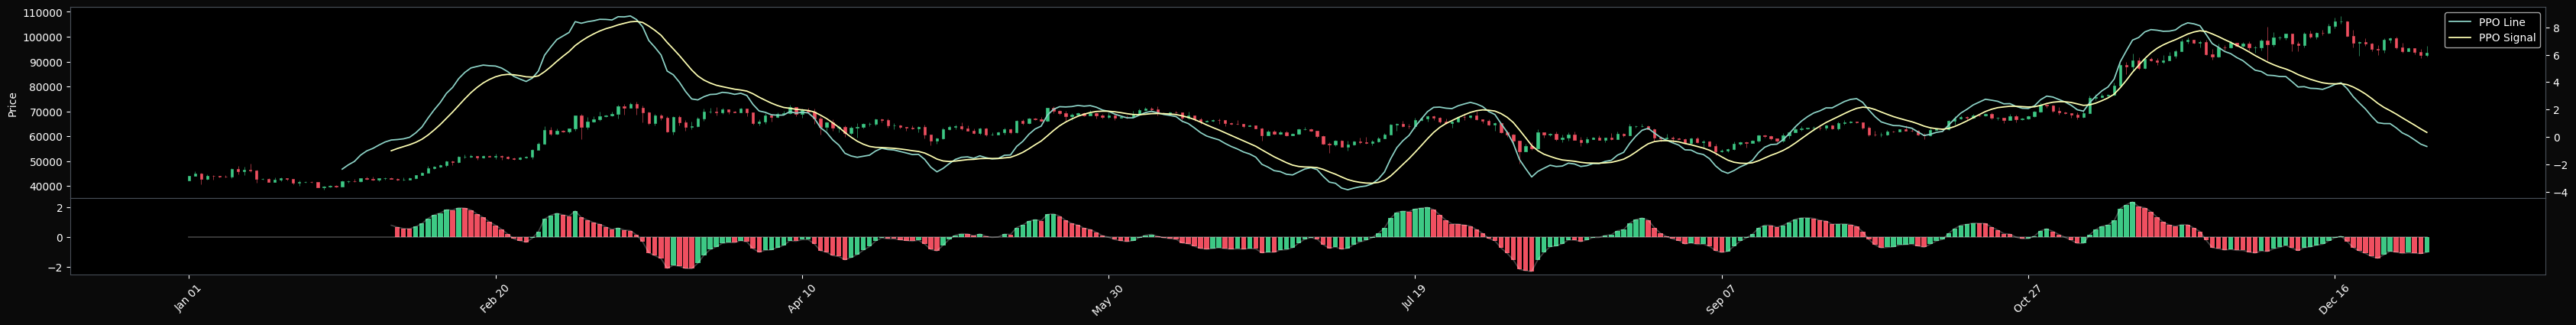

In [30]:
ppo = PercentagePriceOscillator(DATA["Close"], window_slow=26, window_fast=12, window_sign=9)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(ppo.ppo(), label="PPO Line"),
    mpf.make_addplot(ppo.ppo_signal(), label="PPO Signal"),
    *_create_histogram(ppo.ppo_hist(), panel=1)
])

### PVO: Percentage Volume Oscillator 

A momentum oscillator for volume. The PVO measures the difference between two volume-based moving averages as a percentage of the larger moving average.

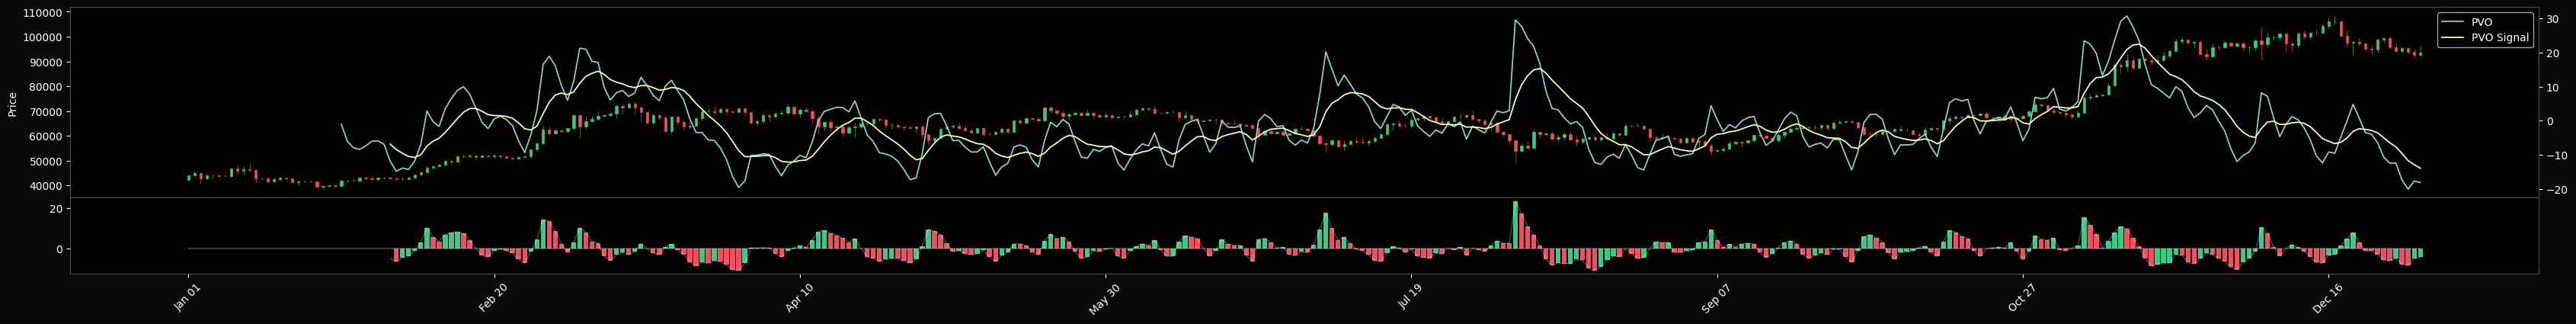

In [31]:
pvo = PercentageVolumeOscillator(DATA["Volume"], window_slow=26, window_fast=12, window_sign=9)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(pvo.pvo(), label="PVO"),
    mpf.make_addplot(pvo.pvo_signal(), label="PVO Signal"),
    *_create_histogram(pvo.pvo_hist(), panel=1)
])

### KAMA: Kaufman Adaptive Moving Average 

Moving average designed to account for market noise or volatility.

KAMA will closely follow prices when the price swings are relatively small and the noise is low.

KAMA will adjust when the price swings widen and follow prices from a greater distance.

This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

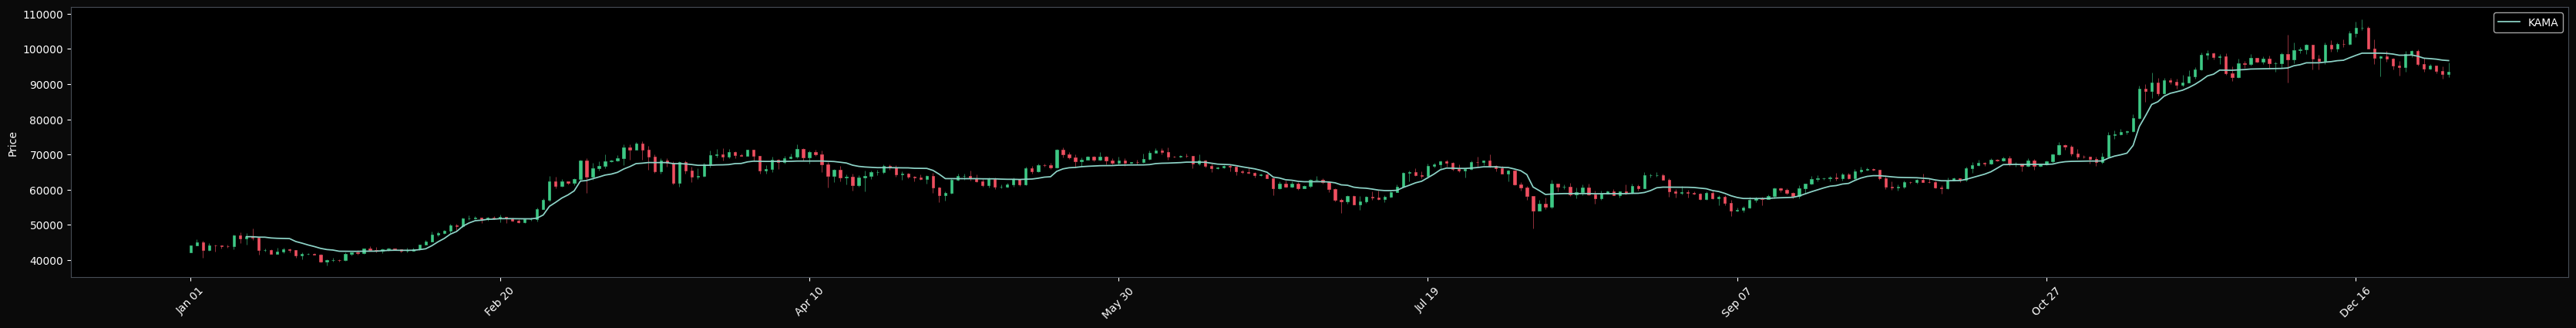

In [32]:
kama = KAMAIndicator(DATA["Close"], window=10, pow1=2, pow2=30).kama()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(kama, label="KAMA")])

## Volume

### ADI: Accumulation / Distribution Indicator 

The **A/D** indicator is a valuable tool used in technical analysis to assess whether a stock is being accumulated (bought) or distributed (sold). 

Trend Confirmation
- When the A/D line is rising, it indicates accumulation. This suggests buying pressure and a potential bullish trend.
- Conversely, a falling A/D line confirms a price downtrend.
- If the price is rising while the A/D indicator is falling, it suggests that buying volume may not be sufficient to support the price rise. A price decline could be imminent.

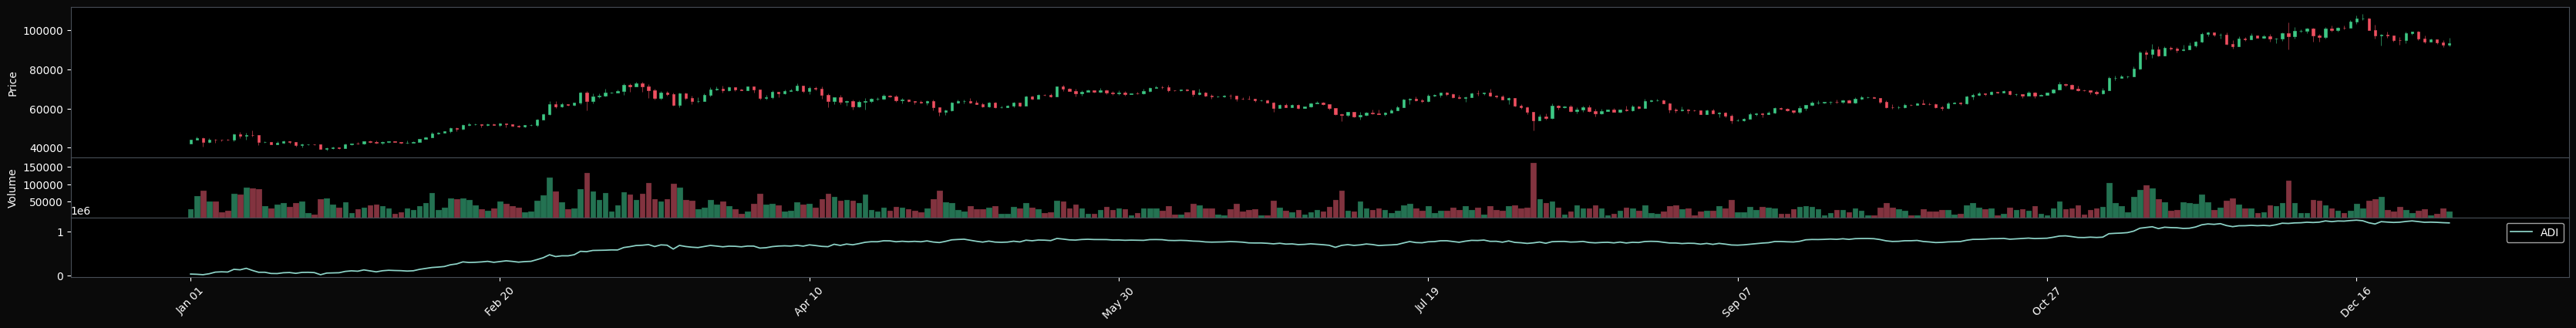

In [33]:
adi = AccDistIndexIndicator(DATA["High"], DATA["Low"], DATA["Close"], DATA["Volume"]).acc_dist_index()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(adi, label="ADI", panel=2)])

### OBV: On Balance Volume 

The **OBV** indicator uses volume flow to predict changes in stock price.

Tips for Using OBV
- Draw trend lines based on candle closes (not wicks or opens).
- Focus on OBV direction and slope rather than the absolute OBV number.
- Remember that volume changes often precede price movements.

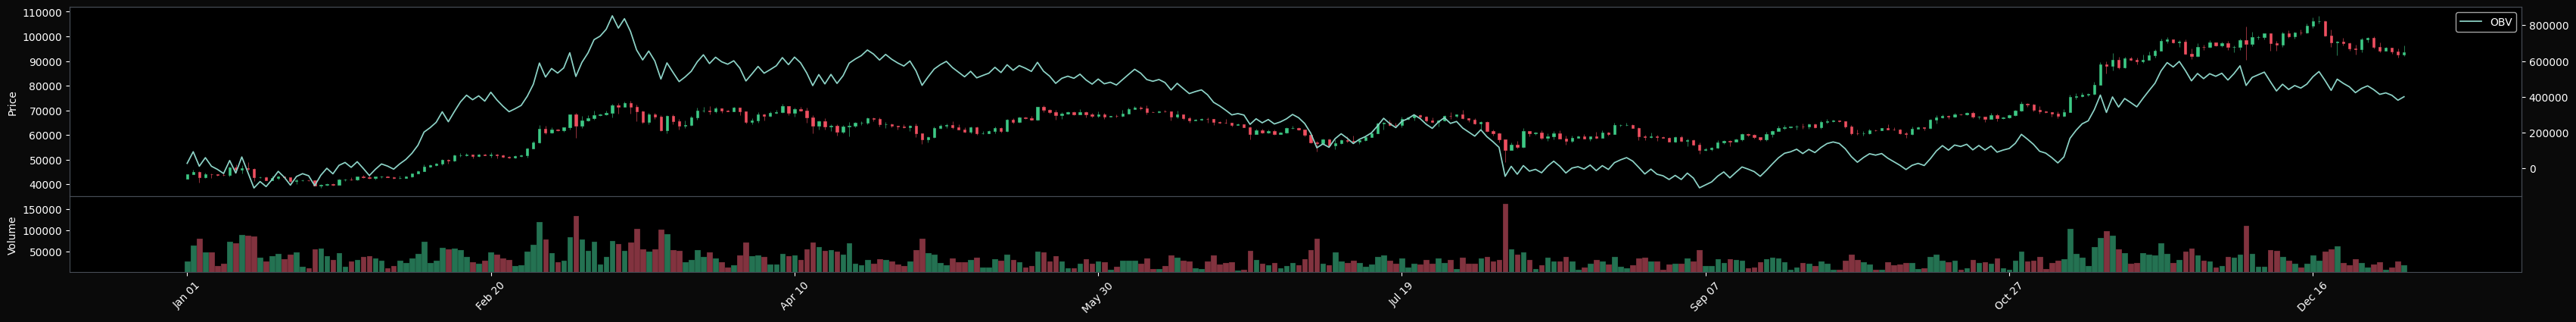

In [34]:
obv = OnBalanceVolumeIndicator(DATA["Close"], DATA["Volume"]).on_balance_volume()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(obv, label="OBV")])

### CMF: Chaikin Money Flow 

It measures the amount of Money Flow Volume over a specific period.

Interpretation:
- **CMF** values above zero indicate buying pressure.
- **CMF** values below zero suggest selling pressure.
- If the **CMF** rises above 0.20 or falls below -0.20, it may signal that the market is overbought or oversold.

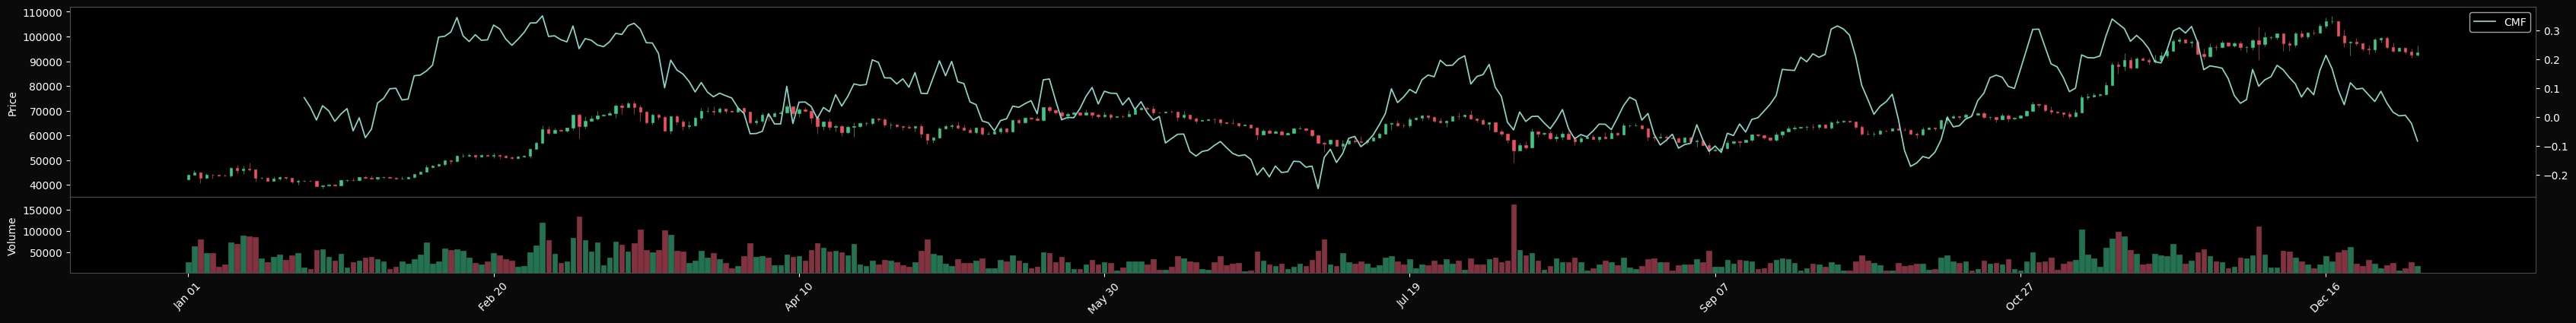

In [35]:
cmf = ChaikinMoneyFlowIndicator(DATA["High"], DATA["Low"], DATA["Close"], DATA["Volume"], window=20).chaikin_money_flow()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(cmf, label="CMF")])

### Force Index

It measures the strength or power behind market movements. Specifically, it assesses the force of bulls during rallies and the force of bears during declines.

High positive values mean there is a strong rising trend, and low values signify a strong downward trend.

Interpretation
- Positive Force Index
    - Indicates strong bullish force.
    - Associated with significant price moves and high volume.
- Negative Force Index
    - Suggests strong bearish force.
    - Occurs when closing prices are lower than the previous day.
- Zero Force Index
    - Indicates an unchanged market.
    - Neither bulls nor bears have a clear advantage.

- Using Moving Averages
    - Combine the Force Index with a moving average (MA) for better predictive success.
    - Use a two-day exponential moving average (EMA) for smoothing.
    - Buy when the two-day EMA of the Force Index is negative and sell when it’s positive.
    - Always consider the overall trend (13-day EMA of prices) when making trading decisions.

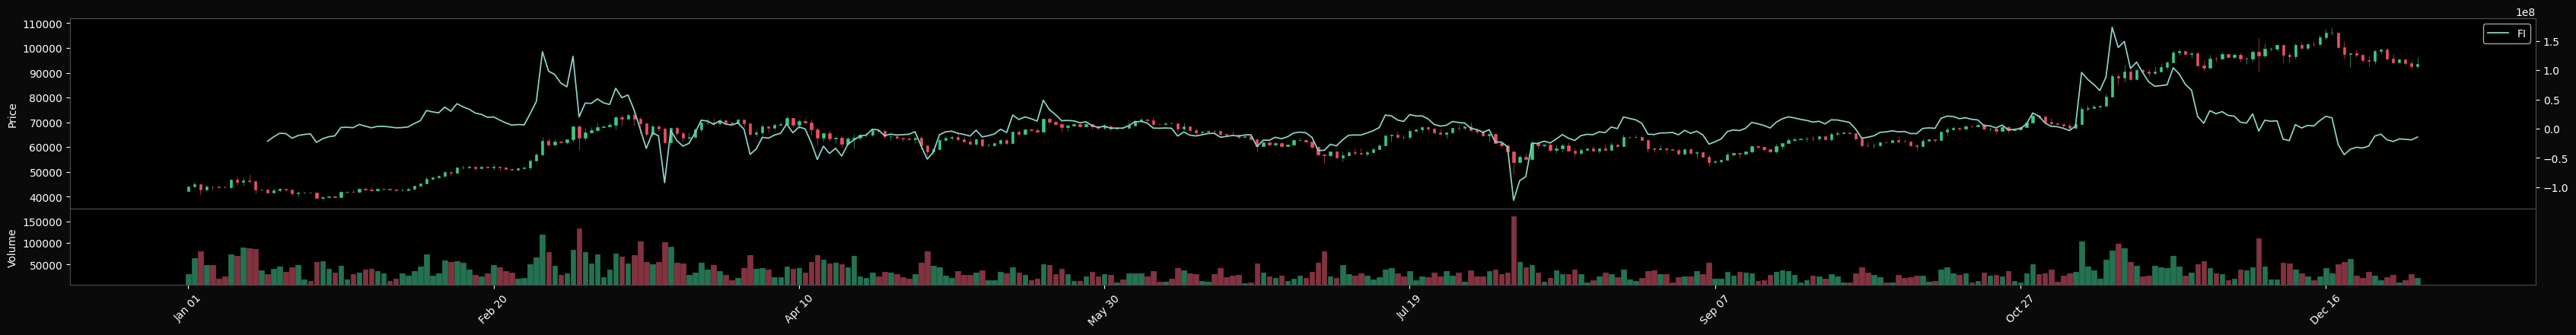

In [36]:
fi = ForceIndexIndicator(DATA["Close"], DATA["Volume"], window=13).force_index()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(fi, label="FI")])

### EOM: Ease of Movement 

It relates an asset's price change to its volume and is particularly useful for assessing the strength of a trend.

Interpretation
- When the EMV creates output values above zero and rising, it suggests that the price is increasing on low volume.
- Falling negative values indicate that the price is dropping on low volume.

*Some analysts add a moving average to the EMV line and use it as a trigger line for trading signals.*

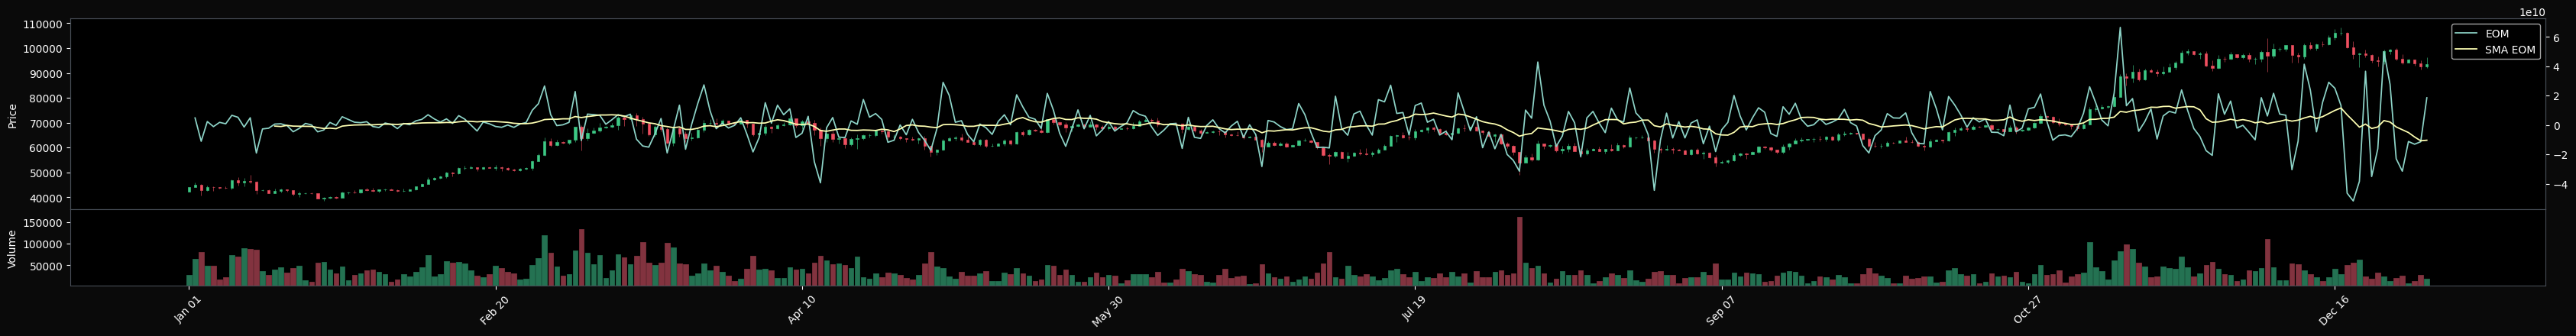

In [37]:
eom = EaseOfMovementIndicator(DATA["High"], DATA["Low"], DATA["Volume"], window=14)
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[
    mpf.make_addplot(eom.ease_of_movement(), label="EOM"),
    mpf.make_addplot(eom.sma_ease_of_movement(), label="SMA EOM")
])

### VPT: Volume Price Trend 

Is based on a running cumulative volume that adds or subtracts a multiple of the percentage change in share price trend and current volume, depending upon the investment's upward or downward movements.

Trading Signals
- A signal line (a moving average of the VPT) can generate trading signals.
- Traders may buy when the VPT line crosses above its signal line and sell when it crosses below.
- Combine the VPT with moving averages and the Average Directional Index (ADX) to confirm trends.

For example:
- Buy if the 20-day moving average is above the 50-day moving average and accompanied by rising VPT values.
- Sell if the 20-day moving average is below the 50-day moving average and the VPT values are falling.
- ADX readings above 25 indicate trending markets.

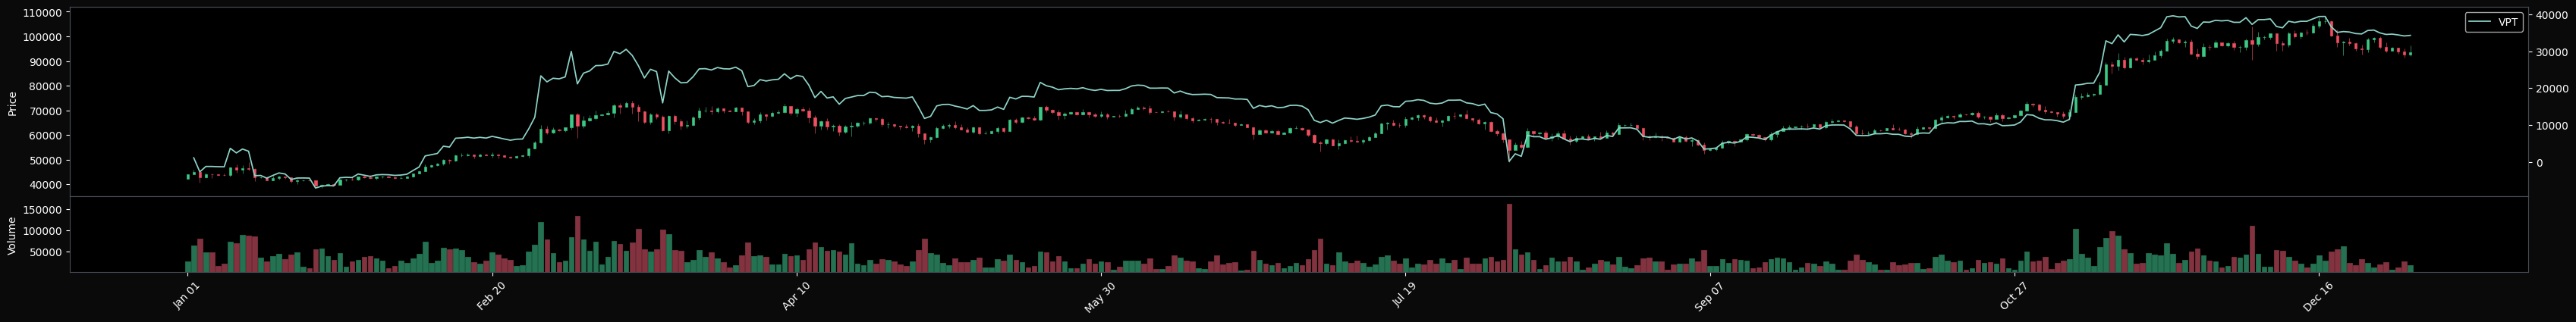

In [38]:
vpt = VolumePriceTrendIndicator(DATA["Close"], DATA["Volume"]).volume_price_trend()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(vpt, label="VPT")])

### VWAP: Volume Weighted Average Price 

VWAP equals the dollar value of all trading periods divided by the total trading volume for the current day.

Definition
- The VWAP represents the average price at which a security has traded throughout a single day’s trading session.
- It is calculated by considering both volume and price.
- Think of it as a smoother line on intraday charts, similar to a moving average.

The calculation starts when trading opens and ends when it closes. Because it is good for the current trading day only, intraday periods and data are used in the calculation.

Usage
- VWAP appears as a single line on intraday charts.
- Short-term traders find it most useful.
- Consider stocks below VWAP as undervalued and those above it as overvalued.
- Go long on stocks when prices move above VWAP.
- Sell or initiate short positions when prices move below VWAP.

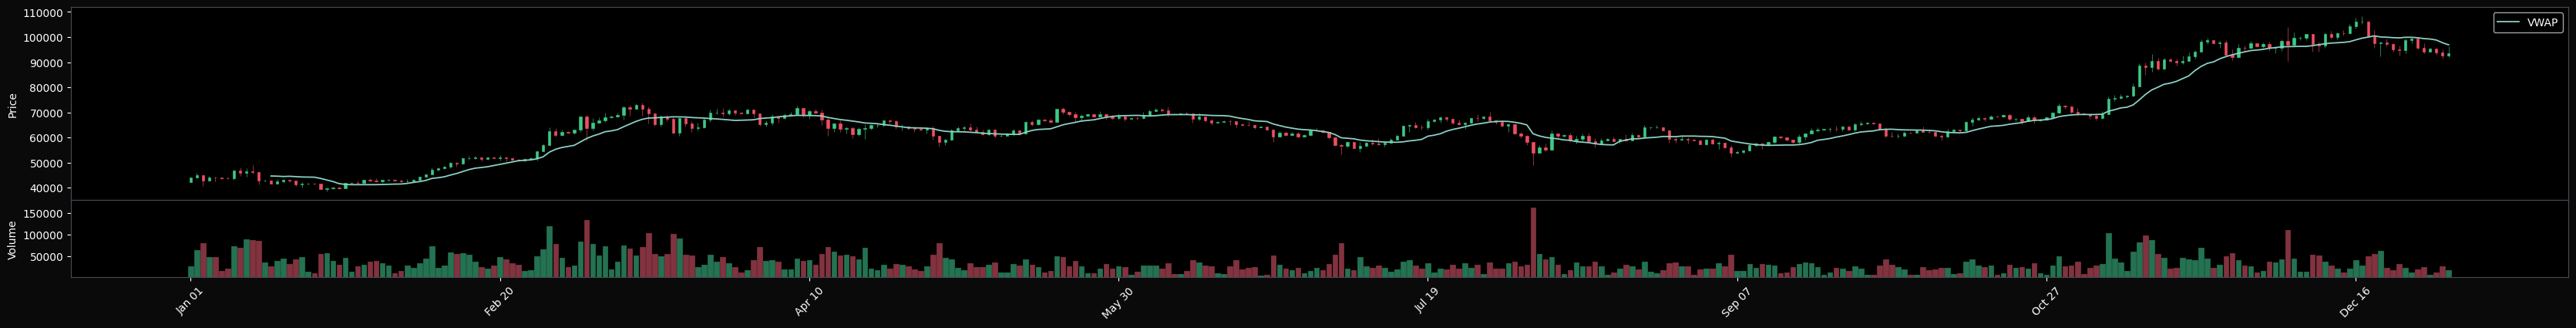

In [39]:
vwap = VolumeWeightedAveragePrice(DATA["High"], DATA["Low"], DATA["Close"], DATA["Volume"], window=14).volume_weighted_average_price()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(vwap, label="VWAP")])

### MFI: Money Flow Index 

- The MFI oscillates between 0 and 100.
- Uses both price and volume to measure buying and selling pressure.
- It is positive when the typical price rises (buying pressure) and negative when the typical price declines (selling pressure).
- Overbought conditions: When the MFI crosses above 80, it suggests that the asset is overbought, and a potential reversal or correction may occur.
- Oversold conditions: When the MFI drops below 20, it indicates that the asset is oversold, and a potential upward reversal may happen.
- Divergence: if the price makes a higher high while the MFI makes a lower high, it could signal weakness in the trend.
- Shorter look-back periods make the MFI more sensitive to recent price changes, while longer periods smooth out fluctuations.

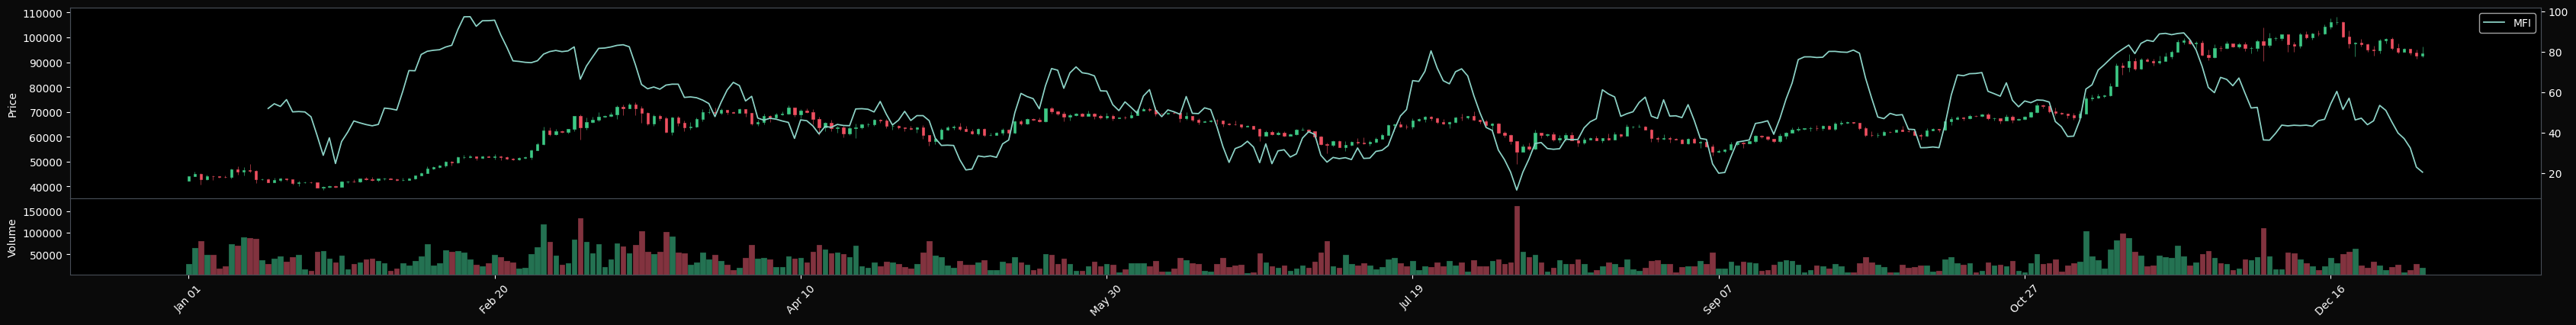

In [40]:
mfi = MFIIndicator(DATA["High"], DATA["Low"], DATA["Close"], DATA["Volume"], window=14).money_flow_index()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(mfi, label="MFI")])

### NVI: Negative Volume Index 

The Negative Volume Index (NVI) is a cumulative indicator that uses the change in volume to decide when the smart money is active.

Purpose and Overview:
- It is a cumulative indicator, meaning that changes to the indicator accumulate over time.
- Specifically, it focuses on how price movements correlate with down volume days.

Smart Money and Volume:
- The NVI assumes that smart money (typically institutional investors) produces price moves that require less volume than the rest of the crowd.
- It aims to capture the influence of institutional investors on price changes.

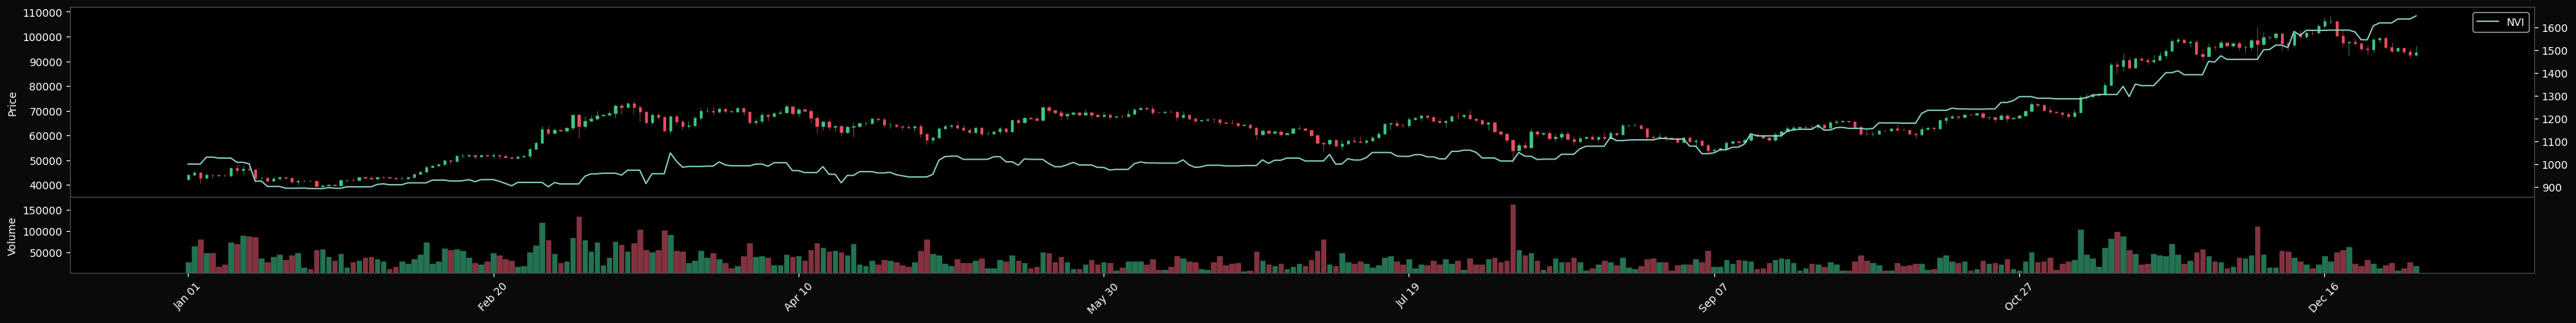

In [41]:
nvi = NegativeVolumeIndexIndicator(DATA["Close"], DATA["Volume"]).negative_volume_index()
mpf.plot(DATA, type="candle", volume=True, style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(nvi, label="NVI")])

## Volatility

### BOBA: Bollinger Bands 

Bollinger Bands are a technical analysis tool used to measure a market's volatility and identify potential overbought or oversold conditions.

:param window: the number of periods used to calculate the moving average and the standard deviation.

:param window_dev: determines how many standard deviations away from the middle band the upper and lower bands are placed.

- Shorter Window (e.g., 10 periods):
    The bands will be more sensitive and react more quickly to price changes, resulting in narrower bands.
    This can provide more signals but may also increase the risk of false signals due to market noise.

- Longer Window (e.g., 50 periods):
    The bands will be smoother and less sensitive to short-term price fluctuations, resulting in wider bands.
    This can help filter out noise but may delay signals.

- Smaller Deviation (e.g., 1 standard deviation):
    The bands will be closer to the middle band, capturing more price movements within the bands.
    This can lead to more frequent signals of overbought or oversold conditions.

- Larger Deviation (e.g., 3 standard deviations):
    The bands will be farther from the middle band, capturing fewer price movements within the bands.
    This can reduce the frequency of signals but increase their reliability, indicating stronger overbought or oversold conditions when they do occur.

- hband: upper band
- hband_indicator: 1 if "Close" is higher than bollinger high band, else 0
- lband: lower band
- lband_indicator: 1 if "Close" is lower than bollinger low band, else 0
- mavg: simple moving average
- wband: band width
- pband: percentage band %B = (Current Price - Lower Band) / (Upper Band - Lower Band)
    - %B Above 1 = Price is Above the Upper Band
    - %B Equal to 1 = Price is at the Upper Band
    - %B Above .50 = Price is Above the Middle Line
    - %B Below .50 = Price is Below the Middle Line
    - %B Equal to 0 = Price is at the Lower Band
    - %B Below 0 = Price is Below the Lower Band
    Generally speaking .80 and .20 are also relevant levels.
    - %B Above .80 = Price is Nearing the Upper Band
    - %B Below .20 = Price is Nearing the Lower Band

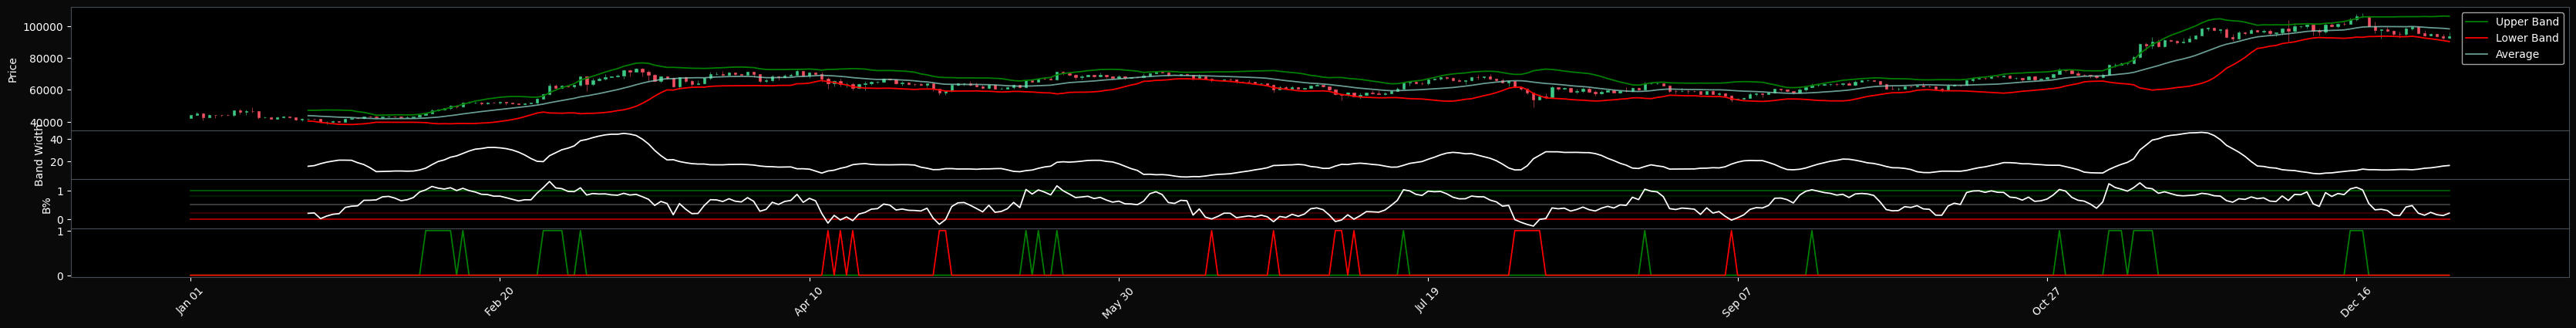

In [42]:
boba = BollingerBands(DATA["Close"], window=20, window_dev=2)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    # high, low and average bands
    mpf.make_addplot(boba.bollinger_hband(), color="g", label="Upper Band"),
    mpf.make_addplot(boba.bollinger_lband(), color="r", label="Lower Band"),
    mpf.make_addplot(boba.bollinger_mavg(), alpha=0.75, label="Average"),
    # band width
    mpf.make_addplot(boba.bollinger_wband(), color="w", ylabel="Band Width", panel=1),
    # percentage band
    mpf.make_addplot([1] * len(DATA), color="g", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot([0.8] * len(DATA), color="g", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.5] * len(DATA), color="w", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.2] * len(DATA), color="r", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0] * len(DATA), color="r", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot(boba.bollinger_pband(), color="w", ylabel="B%", panel=2),
    # indicators
    mpf.make_addplot(boba.bollinger_hband_indicator(), color="g", panel=3),
    mpf.make_addplot(boba.bollinger_lband_indicator(), color="r", panel=3)
])

### Keltner Channel

Keltner Channels are a trend following indicator used to identify reversals with channel breakouts and channel direction.

Channels can also be used to identify overbought and oversold levels when the trend is flat.

- KCH: Showing a simple moving average line (high) of typical price.
- KCHI: Keltner Channel High Band Indicator. Returns 1, if close is higher than keltner high band channel. Else, return 0.
- KCL: Showing a simple moving average line (low) of typical price.
- KCLI: Keltner Channel Low Band Indicator. Returns 1, if close is lower than keltner low band channel. Else, return 0.
- KCC: Showing a simple moving average line (central) of typical price.
- KCP: Keltner Channel Percentage Band.
- KCW: Keltner Channel Band Width.

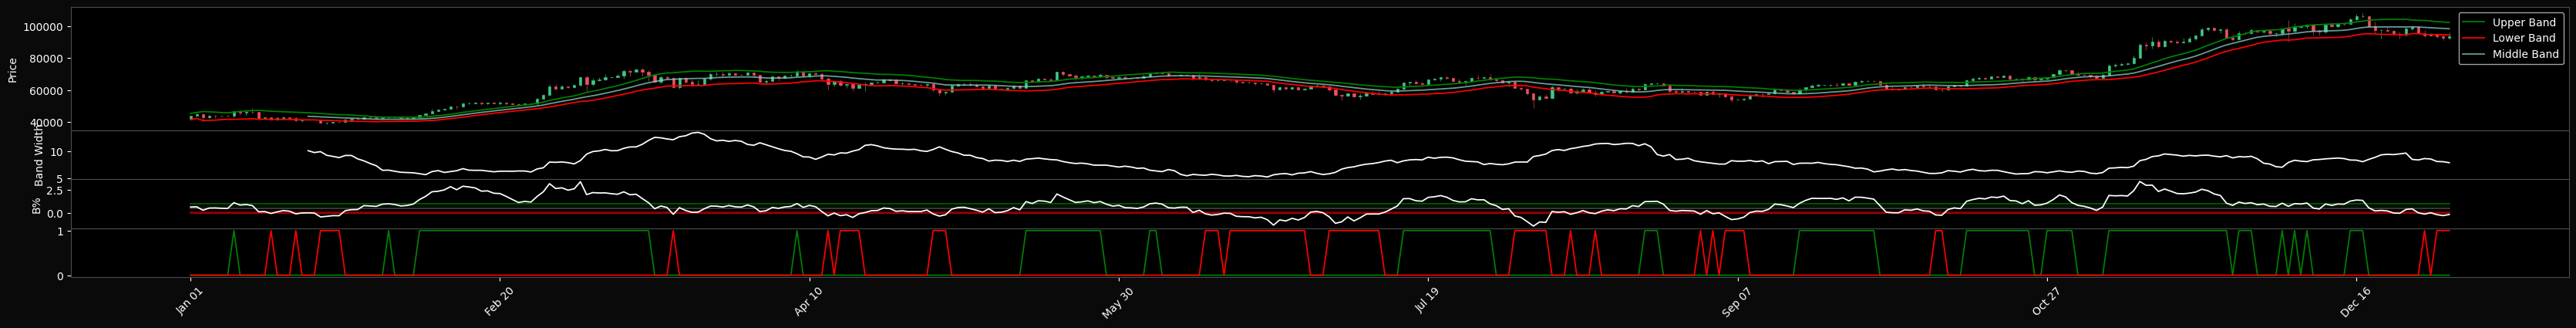

In [43]:
kc = KeltnerChannel(DATA["High"], DATA["Low"], DATA["Close"], window=20, window_atr=10)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    # high, low and middle bands
    mpf.make_addplot(kc.keltner_channel_hband(), color="g", label="Upper Band"),
    mpf.make_addplot(kc.keltner_channel_lband(), color="r", label="Lower Band"),
    mpf.make_addplot(kc.keltner_channel_mband(), alpha=0.75, label="Middle Band"),
    # band width
    mpf.make_addplot(kc.keltner_channel_wband(), color="w", ylabel="Band Width", panel=1),
    # percentage band
    mpf.make_addplot([1] * len(DATA), color="g", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot([0.8] * len(DATA), color="g", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.5] * len(DATA), color="w", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.2] * len(DATA), color="r", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0] * len(DATA), color="r", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot(kc.keltner_channel_pband(), color="w", ylabel="B%", panel=2),
    # indicators
    mpf.make_addplot(kc.keltner_channel_hband_indicator(), color="g", panel=3),
    mpf.make_addplot(kc.keltner_channel_lband_indicator(), color="r", panel=3)
])

### Donchian Channel

- DDH: Donchian Channel High Band. The upper band marks the highest price of an issue for n periods.
- DDL: Donchian Channel Low Band. The lower band marks the lowest price for n periods.
- DDM: Donchian Channel Middle Band.
- DDP: Donchian Channel Percentage Band.
- DDW: Donchian Channel Band Width.

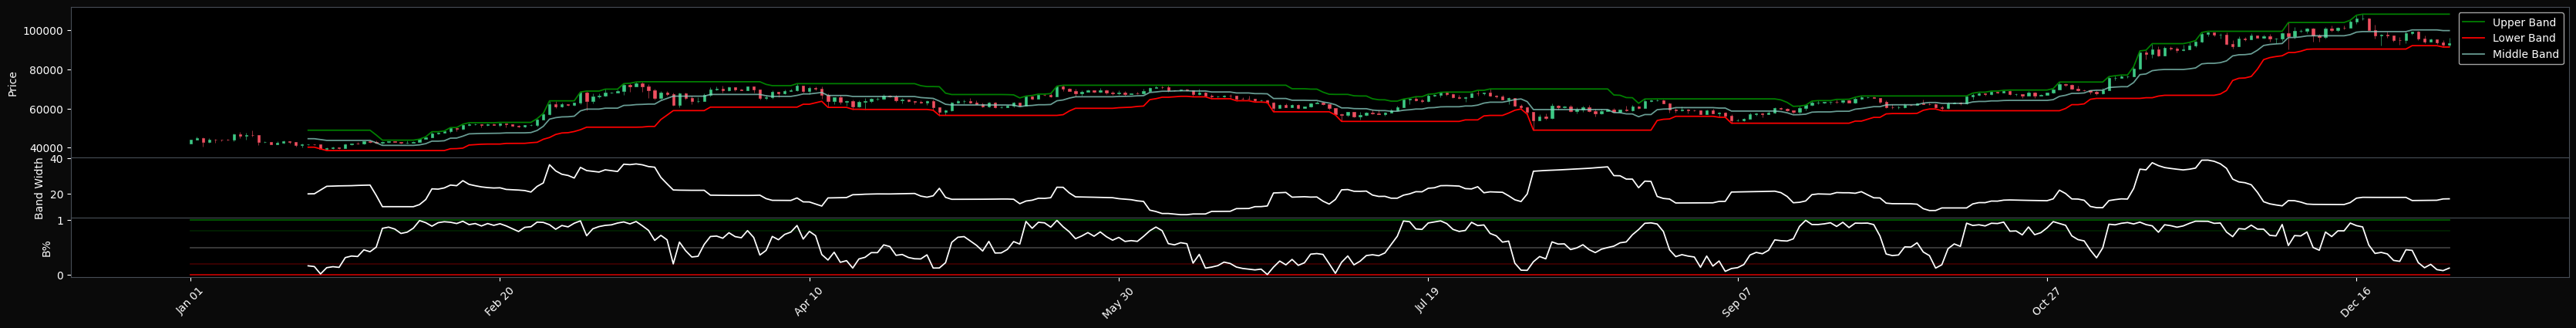

In [44]:
dc = DonchianChannel(DATA["High"], DATA["Low"], DATA["Close"], window=20, offset=0)
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[
    # high, low and middle bands
    mpf.make_addplot(dc.donchian_channel_hband(), color="g", label="Upper Band"),
    mpf.make_addplot(dc.donchian_channel_lband(), color="r", label="Lower Band"),
    mpf.make_addplot(dc.donchian_channel_mband(), alpha=0.75, label="Middle Band"),
    # band width
    mpf.make_addplot(dc.donchian_channel_wband(), color="w", ylabel="Band Width", panel=1),
    # percentage band
    mpf.make_addplot([1] * len(DATA), color="g", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot([0.8] * len(DATA), color="g", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.5] * len(DATA), color="w", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0.2] * len(DATA), color="r", alpha=0.25, secondary_y=False, panel=2),
    mpf.make_addplot([0] * len(DATA), color="r", alpha=0.75, secondary_y=False, panel=2),
    mpf.make_addplot(dc.donchian_channel_pband(), color="w", ylabel="B%", panel=2)
])

### Average True Range 

Definition:
- The ATR measures market volatility by decomposing the entire range of an asset’s price over a specified period.
- It provides insights into how much an asset’s price typically swings during that time frame.

Interpretation:
- Higher ATR values indicate greater volatility, suggesting larger price fluctuations.
- Lower ATR values imply lower volatility and smaller price swings.

Example:
- Suppose an asset has an ATR value of 50 points.
- This means that, on average, the price moves 50 points (up or down) during the specified period (e.g., 14 days).
- While 14 days is common, other time frames (e.g., 7 days or 21 days) can be used.

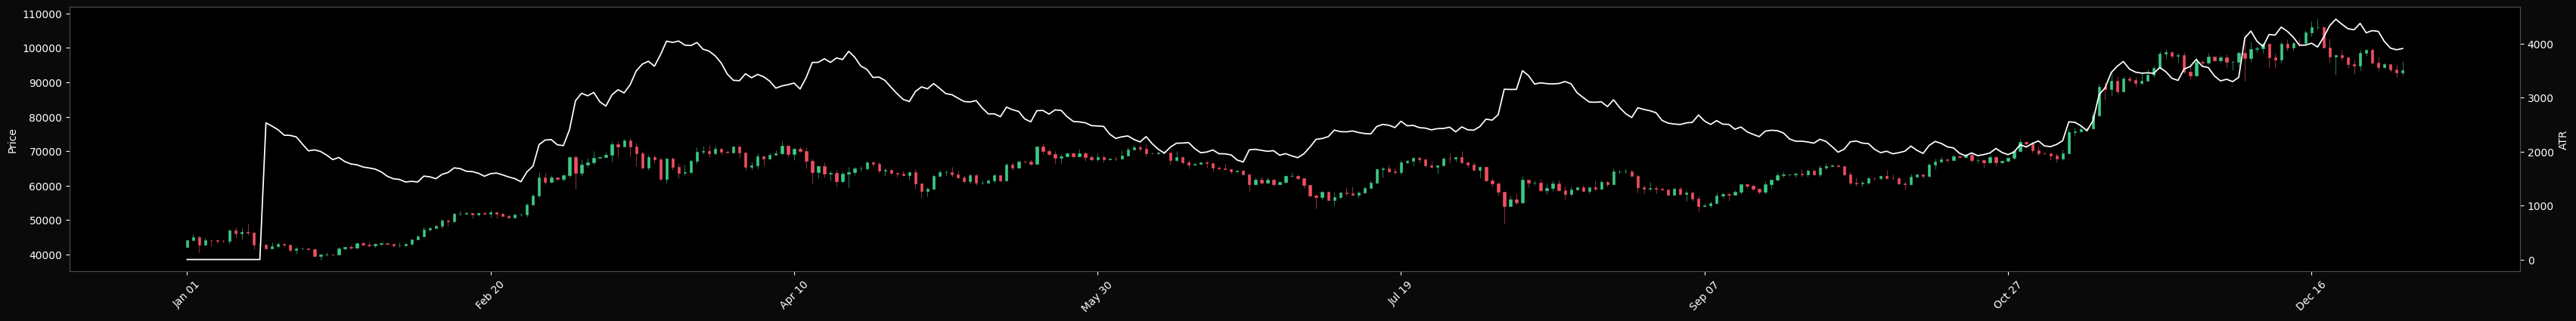

In [45]:
atr = AverageTrueRange(DATA["High"], DATA["Low"], DATA["Close"], window=14).average_true_range()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(atr, color="w", ylabel="ATR")])

### Ulcer Index

Definition:
- The Ulcer Index focuses on the continuous downside movements in a stock’s price.
- It ignores upside volatility and only captures the negative price movements.
- As the stock price moves farther away from a recent high, the Ulcer Index value increases.
- Conversely, when the price rises to new highs, the Ulcer Index falls.

Interpretation:
- A higher Ulcer Index indicates that it takes longer for a stock to recover to its former high after a decline.
- It is designed as a measure of volatility specifically on the downside.
- Traders often experience stress and anxiety during downward movements, which is why it’s called the “Ulcer” Index.

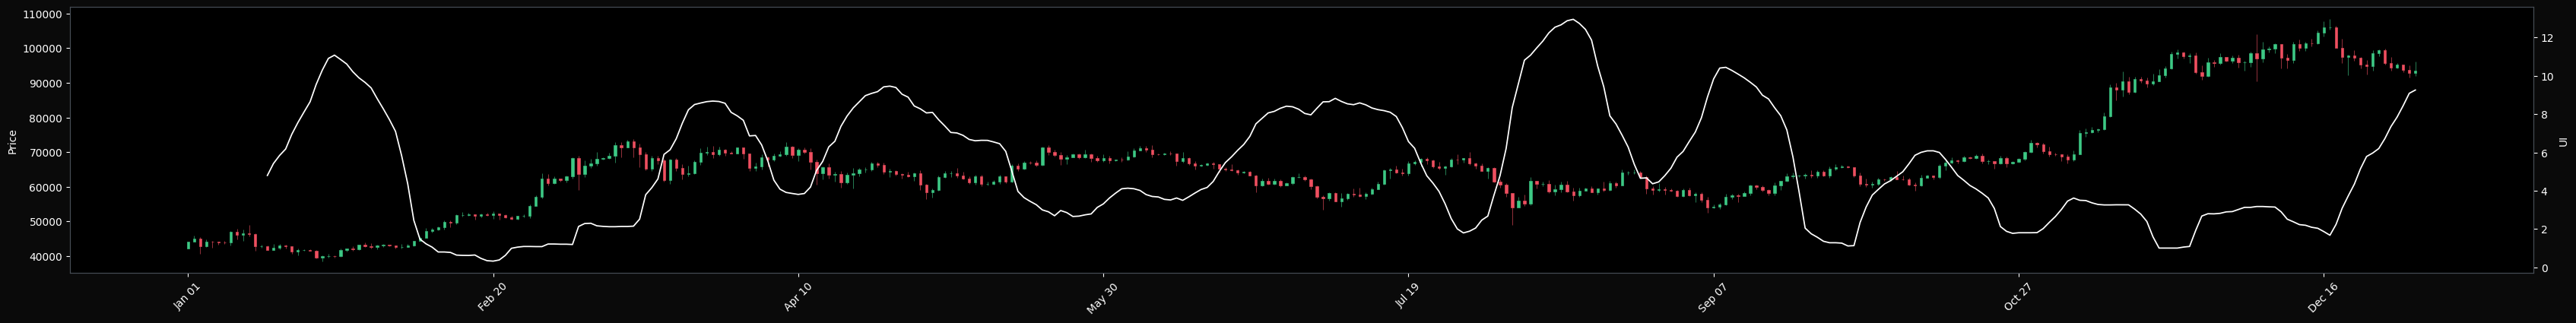

In [46]:
ui = UlcerIndex(DATA["Close"], window=14).ulcer_index()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(ui, color="w", ylabel="UI")])

## Other

### Daily Return Indicator

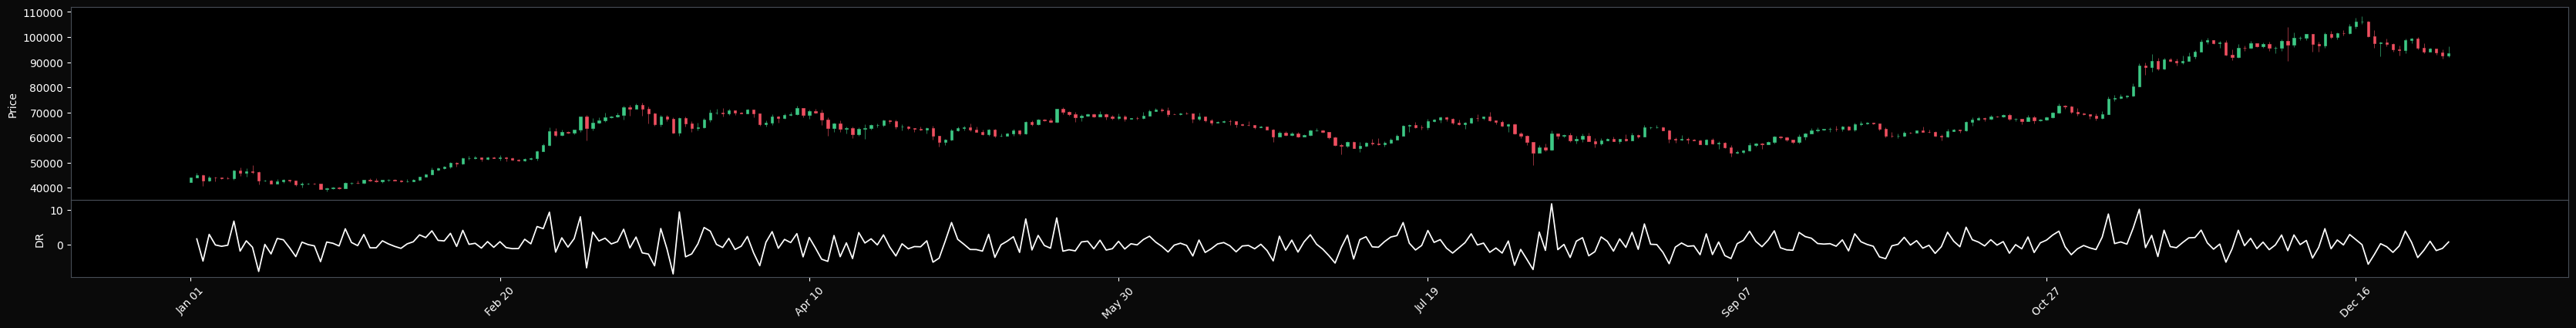

In [47]:
daily_return = DailyReturnIndicator(DATA["Close"]).daily_return()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(daily_return, color="w", ylabel="DR", panel=1)])

### Daily Log Return Indicator

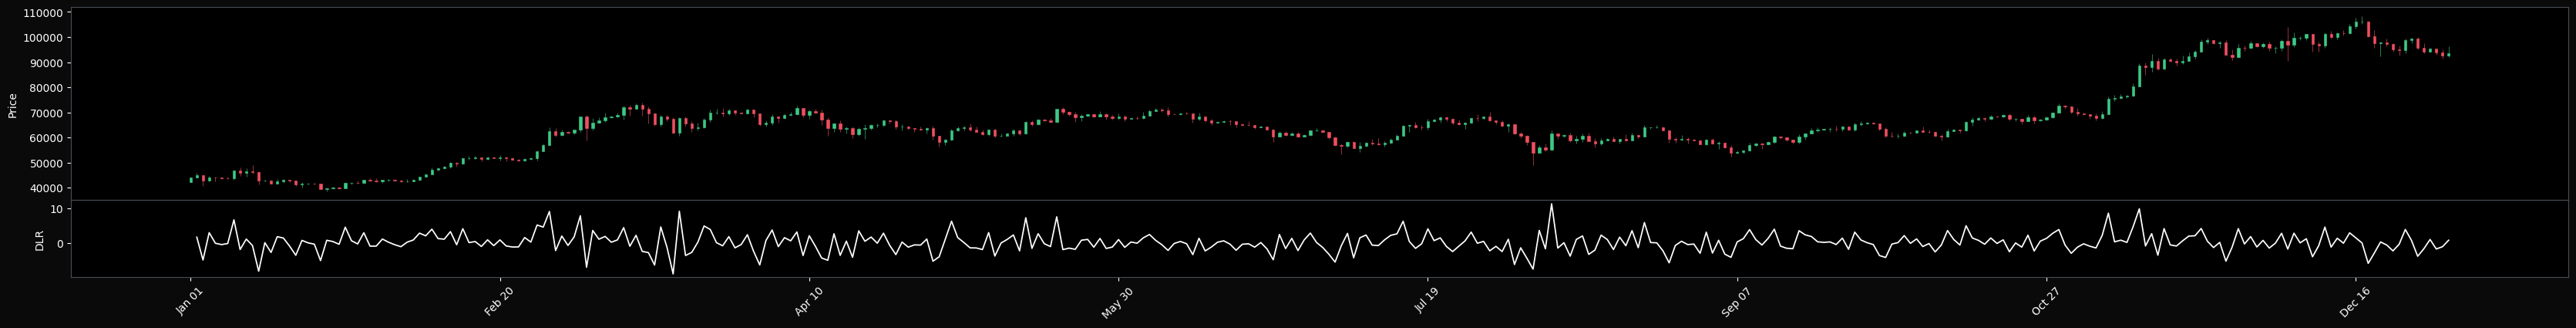

In [48]:
daily_log_return = DailyLogReturnIndicator(DATA["Close"]).daily_log_return()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(daily_log_return, color="w", ylabel="DLR", panel=1)])

### Cumulative Return Indicator

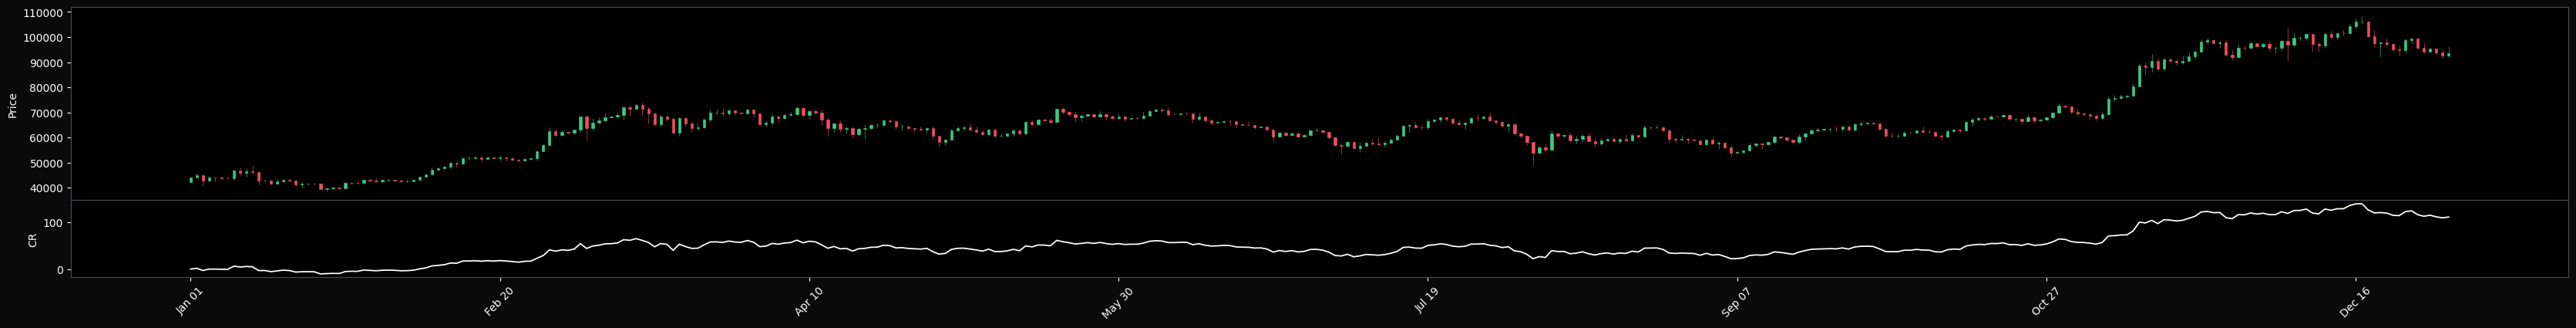

In [49]:
cumulative_return = CumulativeReturnIndicator(DATA["Close"]).cumulative_return()
mpf.plot(DATA, type="candle", style=STYLE, figsize=FIGSIZE, addplot=[mpf.make_addplot(cumulative_return, color="w", ylabel="CR", panel=1)])